# I. Introduction


*Notes : This notebook is prepared to analyze the crawled tweets from Twitter for sentiment analysis regarding Prabowo-Gibran as the presidential and vice-presidential candidates in the 2024 Indonesian election.*

*Model : [indonesian-roberta-base-sentiment-classifier](https://huggingface.co/w11wo/indonesian-roberta-base-sentiment-classifier)*

*Prepared by* : **Achmad Dhani & Faris Arief Mawardi**

# II. Import Libraries and Packages

*Importing Libraries and Packages for the modules to be used in this project.*

In [2]:
!pip install tensorflow_hub

In [3]:
!pip install wordcloud

In [4]:
!pip install tensorflow

In [2]:
# String operations using regular expressions
import re

# Natural Language Toolkit (NLTK) for natural language processing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# String module for string-related functions such as letter constants and punctuation
import string

# NumPy for array support and matrix operations
import numpy as np

# Pandas for data manipulation and analysis
import pandas as pd

# Seaborn for data visualization based on Matplotlib
import seaborn as sns

# Matplotlib for data visualization
import matplotlib.pyplot as plt

# TensorFlow for machine learning and deep learning
import tensorflow as tf
import tensorflow_hub as tf_hub

# Functions and classes from scikit-learn for data splitting, vectorization, and evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Warnings to control notification behavior
import warnings
warnings.filterwarnings('ignore')

# Components of the Keras API in TensorFlow
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Dropout, BatchNormalization, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import TextVectorization

# WordCloud for visual representation of word frequencies in text
from wordcloud import WordCloud

# Counter module to count elements in a list
from collections import Counter

# Set of stopwords from NLTK used in natural language processing
from nltk.corpus import stopwords as nltk_stopwords

nltk.download('stopwords')
nltk.download('punkt')
!pip install pysastrawi

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fariskoms\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Fariskoms\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# III. Data Loading

*Loading the datasets to be used in this project and merged it into one combined dataset.*

In [6]:
# Loading November datasets
nov15=pd.read_csv(r"C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_01122023.csv",delimiter=',')
nov16=pd.read_csv(r"C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_16112023.csv",delimiter=',')
nov17=pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_17112023.csv',delimiter=',')
nov18=pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_18112023.csv',delimiter=',')
nov19=pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_19112023.csv',delimiter=',')
nov20=pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_20112023.csv',delimiter=',')
nov21=pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_21112023.csv',delimiter=',')
nov22=pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_22112023.csv',delimiter=',')
nov23=pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_23112023.csv',delimiter=',')
nov24=pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_24112023.csv',delimiter=',')
nov25=pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_25112023.csv',delimiter=',')
nov26=pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_26112023.csv',delimiter=',')
nov27=pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_27112023.csv',delimiter=',')
nov28=pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_28112023.csv',delimiter=',')
nov29=pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_29112023.csv',delimiter=',')
nov30=pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_30112023.csv',delimiter=',')

In [8]:
# Combining November Datasets
data_nov = pd.concat([nov15,nov16,nov17,nov18,nov19,nov20,nov21,nov22,nov23,nov24,nov25,nov26,nov27,nov28,nov29,nov30], ignore_index=True)
data_nov

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,VerifiedStatus,FollowersCount,sentiment_label,sentiment_score,hashtag
0,2023-12-01 23:59:45+00:00,1730738486834307384,@Momonsimomon @NOTASLIMBOY bisa bisanya dibila...,0,1,0,0,in,1118336694971854848,1730559473801211931,MinjaaWira,https://twitter.com/MinjaaWira/status/17307384...,Not Verified,5,negatif,-1,[]
1,2023-12-01 23:59:43+00:00,1730738480488300849,@Heraloebss @PartaiSocmed @kurawa @mazzini_gsp...,0,0,0,0,in,509930026,1730564513710391575,PakDheGondrong,https://twitter.com/PakDheGondrong/status/1730...,Not Verified,Follower Count Not Found,positif,1,[]
2,2023-12-01 23:59:09+00:00,1730738334925021574,@ZulkifliLubis69 @tvOneNews @ILCTalkshow @anie...,0,0,0,0,in,1505123419133661187,1730201336602567102,AnangS48648467,https://twitter.com/AnangS48648467/status/1730...,Not Verified,357,netral,0,[]
3,2023-12-01 23:59:00+00:00,1730738296932675995,"Hadiri Pengajian BKMT Kota Bekasi, Nofel Saleh...",0,0,46,11,in,721898354502930433,1730738296932675995,golkarpedia,https://twitter.com/golkarpedia/status/1730738...,Not Verified,"2,306",netral,0,"['#airlanggahartarto', '#kuningkeren', '#Prabo..."
4,2023-12-01 23:53:55+00:00,1730737017942843473,@Aryprasetyo85 @007koteka @03__nakula @__AnakK...,0,0,0,0,in,3263924754,1730561759876895203,EkoEkobigcity,https://twitter.com/EkoEkobigcity/status/17307...,Not Verified,236,netral,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,2023-11-30 15:21:18+00:00,1730245627802751073,@gibran_gen Kompak terus Pasangan Prabowo Gibr...,0,0,0,0,in,1719830723455340544,1729068292764225751,anafakecil,https://twitter.com/anafakecil/status/17302456...,Not Verified,Follower Count Not Found,negatif,-1,[]
5001,2023-11-30 15:21:18+00:00,1730245625197867080,@gibran_gen Wehhh capres cawapres idola banget...,0,1,0,0,in,1716612189228867584,1729068292764225751,BernettaCaroll,https://twitter.com/BernettaCaroll/status/1730...,Not Verified,Follower Count Not Found,netral,0,[]
5002,2023-11-30 15:20:48+00:00,1730245502447313139,@CiderVinegarAsm @prabowo @gibran_tweet @kaesa...,0,0,0,0,in,59724693,1730145739609948201,dwikundoyo,https://twitter.com/dwikundoyo/status/17302455...,Not Verified,Follower Count Not Found,negatif,-1,[]
5003,2023-11-30 15:20:24+00:00,1730245400165040238,"Atasi Stunting, Program Peningkatan Gizi Prabo...",0,0,0,0,in,1225432911899324419,1730245400165040238,RepelitaO,https://twitter.com/RepelitaO/status/173024540...,Not Verified,Follower Count Not Found,positif,1,[]


In [9]:
# Loading December Datasets
dec01 =pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_01122023.csv',delimiter=',')
dec02 =pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_02122023.csv',delimiter=',')
dec03 =pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_03122023.csv',delimiter=',')
dec04 =pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_04122023.csv',delimiter=',')
dec05 =pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_05122023.csv',delimiter=',')
dec06 =pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_06122023.csv',delimiter=',')
dec07 =pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_07122023.csv',delimiter=',')
dec08 =pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_08122023.csv',delimiter=',')
dec09 =pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_09122023.csv',delimiter=',')
dec10 =pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_10122023.csv',delimiter=',')
dec11 =pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_11122023.csv',delimiter=',')
dec12 =pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_12122023.csv',delimiter=',')
dec13 =pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_13122023.csv',delimiter=',')
dec14 =pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_14122023.csv',delimiter=',')
dec15 =pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\Cleaned_Data\cleaned_15122023.csv',delimiter=',')

In [11]:
# Combining December Datasets
data_dec = pd.concat([dec01,dec02,dec03,dec04,dec05,dec06,dec07,dec08,dec09,dec10,dec11,dec12,dec13,dec14,dec15], ignore_index=True)
data_dec

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,VerifiedStatus,FollowersCount,sentiment_label,sentiment_score,hashtag
0,2023-12-01 23:59:45+00:00,1730738486834307384,@Momonsimomon @NOTASLIMBOY bisa bisanya dibila...,0,1,0,0,in,1118336694971854848,1730559473801211931,MinjaaWira,https://twitter.com/MinjaaWira/status/17307384...,Not Verified,5,negatif,-1,[]
1,2023-12-01 23:59:43+00:00,1730738480488300849,@Heraloebss @PartaiSocmed @kurawa @mazzini_gsp...,0,0,0,0,in,509930026,1730564513710391575,PakDheGondrong,https://twitter.com/PakDheGondrong/status/1730...,Not Verified,Follower Count Not Found,positif,1,[]
2,2023-12-01 23:59:09+00:00,1730738334925021574,@ZulkifliLubis69 @tvOneNews @ILCTalkshow @anie...,0,0,0,0,in,1505123419133661187,1730201336602567102,AnangS48648467,https://twitter.com/AnangS48648467/status/1730...,Not Verified,357,netral,0,[]
3,2023-12-01 23:59:00+00:00,1730738296932675995,"Hadiri Pengajian BKMT Kota Bekasi, Nofel Saleh...",0,0,46,11,in,721898354502930433,1730738296932675995,golkarpedia,https://twitter.com/golkarpedia/status/1730738...,Not Verified,"2,306",netral,0,"['#airlanggahartarto', '#kuningkeren', '#Prabo..."
4,2023-12-01 23:53:55+00:00,1730737017942843473,@Aryprasetyo85 @007koteka @03__nakula @__AnakK...,0,0,0,0,in,3263924754,1730561759876895203,EkoEkobigcity,https://twitter.com/EkoEkobigcity/status/17307...,Not Verified,236,netral,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8298,2023-12-15 20:51:41+00:00,1735764587679715584,@psi_id 14 Februari 2024 Prabowo Gibran ✌️,0,0,0,0,in,945481436,1735673656259289587,axelbaronn,https://twitter.com/axelbaronn/status/17357645...,Not Verified,Follower Count Not Found,netral,0,[]
8299,2023-12-15 20:51:08+00:00,1735764448273670198,"Inilah satu contoh NEGARA KEKUASAAN"" yg diseb...",0,0,0,0,in,1641722122874814464,1735764448273670198,Indra1444H,https://twitter.com/Indra1444H/status/17357644...,Not Verified,26,netral,0,[]
8300,2023-12-15 20:50:09+00:00,1735764204051931312,@Beritasatu Prabowo Gibran pemimpin paling tep...,0,0,0,0,in,1598486990994874368,1735537443305402560,Rezaind8,https://twitter.com/Rezaind8/status/1735764204...,Not Verified,Follower Count Not Found,positif,1,[]
8301,2023-12-15 20:49:03+00:00,1735763927739572503,@Beritasatu Inilah Prabowo Gibran pemimpin ida...,0,0,0,0,in,1598502855467376642,1735537443305402560,AngestiNina,https://twitter.com/AngestiNina/status/1735763...,Not Verified,Follower Count Not Found,positif,1,[]


In [12]:
# Combining November and December Datasets
data = pd.concat([data_nov,data_dec], ignore_index=True)
data

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,VerifiedStatus,FollowersCount,sentiment_label,sentiment_score,hashtag
0,2023-12-01 23:59:45+00:00,1730738486834307384,@Momonsimomon @NOTASLIMBOY bisa bisanya dibila...,0,1,0,0,in,1118336694971854848,1730559473801211931,MinjaaWira,https://twitter.com/MinjaaWira/status/17307384...,Not Verified,5,negatif,-1,[]
1,2023-12-01 23:59:43+00:00,1730738480488300849,@Heraloebss @PartaiSocmed @kurawa @mazzini_gsp...,0,0,0,0,in,509930026,1730564513710391575,PakDheGondrong,https://twitter.com/PakDheGondrong/status/1730...,Not Verified,Follower Count Not Found,positif,1,[]
2,2023-12-01 23:59:09+00:00,1730738334925021574,@ZulkifliLubis69 @tvOneNews @ILCTalkshow @anie...,0,0,0,0,in,1505123419133661187,1730201336602567102,AnangS48648467,https://twitter.com/AnangS48648467/status/1730...,Not Verified,357,netral,0,[]
3,2023-12-01 23:59:00+00:00,1730738296932675995,"Hadiri Pengajian BKMT Kota Bekasi, Nofel Saleh...",0,0,46,11,in,721898354502930433,1730738296932675995,golkarpedia,https://twitter.com/golkarpedia/status/1730738...,Not Verified,"2,306",netral,0,"['#airlanggahartarto', '#kuningkeren', '#Prabo..."
4,2023-12-01 23:53:55+00:00,1730737017942843473,@Aryprasetyo85 @007koteka @03__nakula @__AnakK...,0,0,0,0,in,3263924754,1730561759876895203,EkoEkobigcity,https://twitter.com/EkoEkobigcity/status/17307...,Not Verified,236,netral,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13303,2023-12-15 20:51:41+00:00,1735764587679715584,@psi_id 14 Februari 2024 Prabowo Gibran ✌️,0,0,0,0,in,945481436,1735673656259289587,axelbaronn,https://twitter.com/axelbaronn/status/17357645...,Not Verified,Follower Count Not Found,netral,0,[]
13304,2023-12-15 20:51:08+00:00,1735764448273670198,"Inilah satu contoh NEGARA KEKUASAAN"" yg diseb...",0,0,0,0,in,1641722122874814464,1735764448273670198,Indra1444H,https://twitter.com/Indra1444H/status/17357644...,Not Verified,26,netral,0,[]
13305,2023-12-15 20:50:09+00:00,1735764204051931312,@Beritasatu Prabowo Gibran pemimpin paling tep...,0,0,0,0,in,1598486990994874368,1735537443305402560,Rezaind8,https://twitter.com/Rezaind8/status/1735764204...,Not Verified,Follower Count Not Found,positif,1,[]
13306,2023-12-15 20:49:03+00:00,1735763927739572503,@Beritasatu Inilah Prabowo Gibran pemimpin ida...,0,0,0,0,in,1598502855467376642,1735537443305402560,AngestiNina,https://twitter.com/AngestiNina/status/1735763...,Not Verified,Follower Count Not Found,positif,1,[]


In [13]:
# Export dataset into csv
data.to_csv('Prabowo-Gibran.csv', index=False)

# IV. Exploratory Data Analysis

*Performing Exploratory Data Analysis (EDA) to investigate and understand the dataset*.

**4.1 Initial Understandings of the Dataset**

In [16]:
data

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,VerifiedStatus,FollowersCount,sentiment_label,sentiment_score,hashtag
0,2023-12-01 23:59:45+00:00,1730738486834307384,@Momonsimomon @NOTASLIMBOY bisa bisanya dibila...,0,1,0,0,in,1118336694971854848,1730559473801211931,MinjaaWira,https://twitter.com/MinjaaWira/status/17307384...,Not Verified,5,negatif,-1,[]
1,2023-12-01 23:59:43+00:00,1730738480488300849,@Heraloebss @PartaiSocmed @kurawa @mazzini_gsp...,0,0,0,0,in,509930026,1730564513710391575,PakDheGondrong,https://twitter.com/PakDheGondrong/status/1730...,Not Verified,Follower Count Not Found,positif,1,[]
2,2023-12-01 23:59:09+00:00,1730738334925021574,@ZulkifliLubis69 @tvOneNews @ILCTalkshow @anie...,0,0,0,0,in,1505123419133661187,1730201336602567102,AnangS48648467,https://twitter.com/AnangS48648467/status/1730...,Not Verified,357,netral,0,[]
3,2023-12-01 23:59:00+00:00,1730738296932675995,"Hadiri Pengajian BKMT Kota Bekasi, Nofel Saleh...",0,0,46,11,in,721898354502930433,1730738296932675995,golkarpedia,https://twitter.com/golkarpedia/status/1730738...,Not Verified,"2,306",netral,0,"['#airlanggahartarto', '#kuningkeren', '#Prabo..."
4,2023-12-01 23:53:55+00:00,1730737017942843473,@Aryprasetyo85 @007koteka @03__nakula @__AnakK...,0,0,0,0,in,3263924754,1730561759876895203,EkoEkobigcity,https://twitter.com/EkoEkobigcity/status/17307...,Not Verified,236,netral,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13303,2023-12-15 20:51:41+00:00,1735764587679715584,@psi_id 14 Februari 2024 Prabowo Gibran ✌️,0,0,0,0,in,945481436,1735673656259289587,axelbaronn,https://twitter.com/axelbaronn/status/17357645...,Not Verified,Follower Count Not Found,netral,0,[]
13304,2023-12-15 20:51:08+00:00,1735764448273670198,"Inilah satu contoh NEGARA KEKUASAAN"" yg diseb...",0,0,0,0,in,1641722122874814464,1735764448273670198,Indra1444H,https://twitter.com/Indra1444H/status/17357644...,Not Verified,26,netral,0,[]
13305,2023-12-15 20:50:09+00:00,1735764204051931312,@Beritasatu Prabowo Gibran pemimpin paling tep...,0,0,0,0,in,1598486990994874368,1735537443305402560,Rezaind8,https://twitter.com/Rezaind8/status/1735764204...,Not Verified,Follower Count Not Found,positif,1,[]
13306,2023-12-15 20:49:03+00:00,1735763927739572503,@Beritasatu Inilah Prabowo Gibran pemimpin ida...,0,0,0,0,in,1598502855467376642,1735537443305402560,AngestiNina,https://twitter.com/AngestiNina/status/1735763...,Not Verified,Follower Count Not Found,positif,1,[]


In [19]:
# Checking duplicated rows
dups = data.duplicated().sum()

print(f"Duplicated rows: {dups}")

Duplicated rows: 512


In [20]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12796 entries, 0 to 13307
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           12796 non-null  object
 1   id_str               12796 non-null  object
 2   full_text            12796 non-null  object
 3   quote_count          12796 non-null  int64 
 4   reply_count          12796 non-null  int64 
 5   retweet_count        12796 non-null  int64 
 6   favorite_count       12796 non-null  int64 
 7   lang                 12796 non-null  object
 8   user_id_str          12796 non-null  object
 9   conversation_id_str  12796 non-null  object
 10  username             12796 non-null  object
 11  tweet_url            12796 non-null  object
 12  VerifiedStatus       12796 non-null  object
 13  FollowersCount       12796 non-null  object
 14  sentiment_label      12796 non-null  object
 15  sentiment_score      12796 non-null  int64 
 16  hashtag  

**Insights :**

In this dataset, there are 12 columns of object type and 5 columns of integer type. Furthermore, this dataset consists of 12,796 entries with the interpretation of each column as follows:

1. **created_at:** Indicates the time when the tweet was created.
2. **id_str:** Unique Identifier for each tweet in string format.
3. **full_text:** Represents the full text of the tweet content.
4. **quote_count:** Indicates the number of quotes made on the tweet.
5. **reply_count:** Indicates the number of replies received for the tweet.
6. **retweet_count:** Indicates the number of retweets received by the tweet.
7. **favorite_count:** Indicates the number of times the tweet has been marked as a favorite.
8. **lang:** Indicates the language used in the tweet.
9. **user_id_str:** Unique identifier for the user who posted the tweet in string format.
10. **conversation_id_str:** Unique identifier for the conversation that the tweet is a part of in string format.
11. **username:** The username of the person posting the tweet.
12. **tweet_url:** The URL link to the tweet.
13. **VerifiedStatus:** Indicates whether the user is verified or not (blue checkmark).
14. **FollowersCount:** The number of followers of the user's account.
15. **sentiment_label:** Indicates the sentiment label (positive, negative, neutral) associated with the tweet.
16. **sentiment_score:** A numerical score assigned to the sentiment of the tweet.
17. **hashtag:** Contains a list of hashtags used in the tweet.

The information that can be gleaned from this dataset involves understanding user engagement (through the count of retweets, favorites, replies, and quotes). In addition, analyzing sentiment labels and scores can provide insights into public sentiment towards certain topics or individuals. Usernames, user IDs, and verification status can be used to identify influential or verified users, while language and hashtags can help analyze the context and trending topics.

**Sentiments Samples**

*In this sub-section, 5 tweets from each sentiment category will be displayed to gain a further understanding of the differences between the three sentiment categories.*

> **Samples of Positive Samples** 

In [23]:
# Filter the data for positive sentiment
positive_samples = data[data['sentiment_label'] == 'positif']

# Display full text of 5 samples of positive sentiment
five_positive_samples = positive_samples['full_text'].sample(5)
print(five_positive_samples)

11371    @gibran_gen @gibran_tweet @prabowo Gibran Teru...
1016     @ilhamram_dani Coblos No 2, Prabowo-Gibran, un...
12453    Wihh Keren! Prabowo-Gibran, dipastikan siap be...
7940     @pro_gibran_ Paslon No 2 paling positif vibes....
1787     Ada gemoy efek Pak Prabowo Subianto  ada Trend...
Name: full_text, dtype: object


From the five example tweets above, it can be concluded that tweets with a positive sentiment are mostly supportive or encouraging towards the candidates Prabowo-Gibran as presidential and vice-presidential nominees of Indonesia.

> **Samples of Neutral Samples**

In [29]:
# Filter the data for positive sentiment
neutral_samples = data[data['sentiment_label'] == 'netral']

# Display full text of 5 samples of positive sentiment
five_neutral_samples = neutral_samples['full_text'].sample(5)
print(five_neutral_samples)

12285    Prabowo-Gibran bikin rumah sakit, Anies-Cak Im...
1810     Hari ini, Prabowo-Gibran daftar ke KPU RI - AN...
2990     Menpora Dito Ariotedjo Dampingi Presiden Jokow...
13068    Prabowo-Gibran berada di urutan pertama dengan...
3920     Wakil Ketua Majelis Syuro PKS Sohibul Iman men...
Name: full_text, dtype: object


From the five example tweets with a neutral sentiment, it can be concluded that most of the neutral-sentiment tweets contain elements of news or information related to campaign activities, work programs, vision and mission, or other matters associated with their activities as presidential and vice-presidential candidates of the Republic of Indonesia.

> **Samples of Negative Samples**

In [36]:
# Filter the data for positive sentiment
negative_samples = data[data['sentiment_label'] == 'negatif']

# Display full text of 5 samples of positive sentiment
five_negative_samples = negative_samples['full_text'].sample(5)
print(five_negative_samples)

2674     @Jelli_cent Ngapain coba coba......, kalau jok...
9650     Prabowo tidak layak jadi Capres karena ada dug...
6081     Prabowo-Gibran simbol kebangkitan Orba! https:...
1074     @tvOneNews 😂😂😂. Ini sih ngeledek @ganjarpranow...
12995    Bansos BLT jadi alat intimidasi untuk memilih ...
Name: full_text, dtype: object


From the five example tweets with negative sentiment above, it can be concluded that tweets falling into the negative sentiment category are those that contain criticism, distrust, sarcasm, and other negative issues related to Prabowo-Gibran as presidential and vice-presidential candidates of the Republic of Indonesia.

**4.2 Words and Hashtags Analysis**

*In this sections, we will observe the most and least frequently used hashtags and phrases correlated to Prabowo-Gibran as the presidential and vice-presidential candidates in the 2024 Indonesian election.*

**Stopwords Initiation**

In [37]:
# Defining the stopwords
stopwords_list = list(set(stopwords.words('indonesian')))
stopwords_list.extend(['oh','Prabowo','Gibran','2024']) 

In [38]:
stopwords_list # Unveiling the words categorized as stopwords

['tegas',
 'meskipun',
 'setinggi',
 'dan',
 'jangankan',
 'rata',
 'sendirian',
 'se',
 'tandasnya',
 'seluruh',
 'setiap',
 'ditunjuknya',
 'soal',
 'sebabnya',
 'dilihat',
 'persoalan',
 'agak',
 'tadi',
 'seperlunya',
 'tanyanya',
 'sekalipun',
 'sebelum',
 'mana',
 'janganlah',
 'sesudah',
 'terdapat',
 'betul',
 'ucapnya',
 'mempersiapkan',
 'pernah',
 'diibaratkannya',
 'diperlukannya',
 'berujar',
 'kala',
 'apa',
 'ikut',
 'lebih',
 'tahu',
 'mempunyai',
 'berapakah',
 'soalnya',
 'menanya',
 'meski',
 'bukannya',
 'bagian',
 'terakhir',
 'bermacam',
 'diri',
 'katakan',
 'berbagai',
 'itukah',
 'bila',
 'bagai',
 'kemungkinannya',
 'mengucapkan',
 'kurang',
 'jauh',
 'caranya',
 'kemudian',
 'dalam',
 'lanjutnya',
 'menantikan',
 'dipersoalkan',
 'dimungkinkan',
 'dong',
 'enggak',
 'baik',
 'meyakini',
 'diminta',
 'tentang',
 'nah',
 'pihak',
 'dipastikan',
 'berkata',
 'terlalu',
 'ingin',
 'supaya',
 'diberikan',
 'tampaknya',
 'terjadi',
 'tak',
 'khususnya',
 'masing',


In [39]:
# Define Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

**Text Preprocessing**

In [40]:
# Create A Function for Text Preprocessing

def text_preprocessing(full_text):
  # Case folding
  full_text = full_text.lower()

  # Mention removal
  full_text = re.sub("@[A-Za-z0-9_]+", " ", full_text)

  # Hashtags removal
  full_text = re.sub("#[A-Za-z0-9_]+", " ", full_text)

  # Newline removal (\n)
  full_text = re.sub(r"\\n", " ",full_text)

  # Whitespace removal
  full_text = full_text.strip()

  # URL removal
  full_text = re.sub(r"http\S+", " ", full_text)
  full_text = re.sub(r"www.\S+", " ", full_text)

  # Non-letter removal (such as emoticon, symbol (like μ, $, 兀), etc
  full_text = re.sub("[^A-Za-z\s']", " ", full_text)

  # Tokenization
  tokens = word_tokenize(full_text)

  # Stopwords removal
  tokens = [word for word in tokens if word not in stopwords_list]

  # # Stemming
  # tokens = [stemmer.stem(word) for word in tokens]

  # Combining Tokens
  full_text = ' '.join(tokens)

  return full_text

In [41]:
# Hashtag Preprocessing
hashtags = data['hashtag']
all_hashtags = ' '.join(hashtags)
hashtags_tokens = word_tokenize(all_hashtags)

In [42]:
# Cleaning the hashtags from stopwords
hashtags_cleaned = [word.lower() for word in hashtags_tokens if word.isalpha()]

In [43]:
hashtags_cleaned

['airlanggahartarto',
 'kuningkeren',
 'prabowogibran',
 'partaigolkar',
 'golkarpedia',
 'partaigolkar',
 'golkarprabowo',
 'bersamaindonesiamaju',
 'prabowogemoy',
 'pagi',
 'prabowogibran',
 'kampanyekreatif',
 'ai',
 'chatgpt',
 'midjourney',
 'runwayml',
 'pikalab',
 'capcut',
 'kolab',
 'poliklitik',
 'airlanggahartarto',
 'kuningkeren',
 'prabowogibran',
 'partaigolkar',
 'golkarpedia',
 'bersamaindonesiamaju',
 'prabowogemoy',
 'bersamaindonesiamaju',
 'prabowogemoy',
 'bersamaindonesiamaju',
 'prabowogemoy',
 'news',
 'programmakangratis',
 'prabowogibran',
 'danablt',
 'anggaran',
 'prabowogibran',
 'menangsatuputaran',
 'habiburokhmandprri',
 'gerindra',
 'airlanggahartarto',
 'kuningkeren',
 'prabowogibran',
 'partaigolkar',
 'golkarpedia',
 'prabowogibran',
 'pemiludamai',
 'bersamaindonesiamaju',
 'prabowogemoy',
 'bersamaindonesiamaju',
 'prabowogemoy',
 'bersamaindonesiamaju',
 'prabowogemoy',
 'prabowosubianto',
 'prabowogibran',
 'indonesiamaju',
 'makangratis',
 'mak

In [44]:
# Applying Text Preprocessing to the Dataset

data['text_processed'] = data['full_text'].apply(lambda x: text_preprocessing(x))

**Wordclouds Initiation**

In [45]:
# Initiate the wordcloud for hashtags feature
hashtags_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(hashtags_cleaned))

# Initiate the wordcloud for the texts in tweets
text_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['text_processed']))

**Wordclouds Visualizations**

> **Wordclouds of Hashtags**

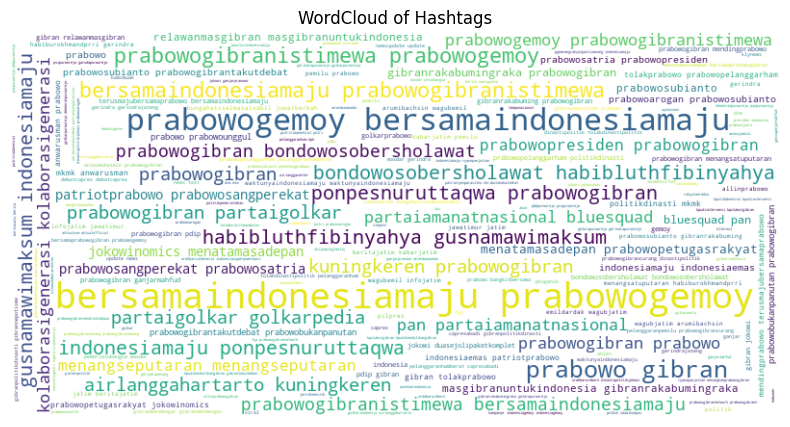

In [46]:
plt.figure(figsize=(10, 5))
plt.imshow(hashtags_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Hashtags')
plt.show()

In [47]:
# Calculating the hashtags frequency
word_counts = Counter(hashtags_cleaned)
most_common = word_counts.most_common(20)  # Unveiling the top 10 most frequently used hashtags

# Unveiling the most frequently used hashtags
print("Words that appear most frequently in the 'hashtags' feature:")
print(most_common)

# Calculating the least frequently used hashtags
least_common = word_counts.most_common()[:-21:-1]  # Unveiling the 10 least used hashtags

# Unveiling the least frequently used hashtags
print("Words that appear least frequently in the 'hashtags' feature:")
print(least_common)

Words that appear most frequently in the 'hashtags' feature:
[('prabowogibran', 799), ('prabowogemoy', 640), ('bersamaindonesiamaju', 599), ('prabowo', 382), ('prabowogibranistimewa', 257), ('gibran', 226), ('indonesiamaju', 184), ('bondowosobersholawat', 162), ('prabowosubianto', 123), ('partaigolkar', 110), ('airlanggahartarto', 107), ('ponpesnuruttaqwa', 106), ('habibluthfibinyahya', 105), ('gusnamawimaksum', 105), ('golkarpedia', 104), ('kuningkeren', 98), ('prabowopresiden', 90), ('kolaborasigenerasi', 86), ('pan', 80), ('partaiamanatnasional', 80)]
Words that appear least frequently in the 'hashtags' feature:
[('nasdem', 1), ('demokratbersamaprabowo', 1), ('rockygerung', 1), ('ganjarsikatkorupsi', 1), ('sipalingganjar', 1), ('kabarpilpres', 1), ('beritapilpres', 1), ('infopilpres', 1), ('aniescakimin', 1), ('penjahat', 1), ('boikot', 1), ('appsi', 1), ('ciputat', 1), ('pedagangpasar', 1), ('tiktokberita', 1), ('gemoybergelora', 1), ('taufanpawe', 1), ('golkarsulsel', 1), ('wisawa

**Insights :**

The list of most frequently used hashtags indicates topics or themes that are widely discussed or emphasized in this dataset. For example:

1. **'prabowogibran', 'prabowogemoy', 'bersamaindonesiamaju', 'prabowo', 'prabowogibranistimewa', 'gibran', 'indonesiamaju'** appear very often. This indicates a significant correlation between these hashtags and the political campaign or movement involving Prabowo-Gibran as the presidential and vice-presidential candidates of the Republic of Indonesia.
2. Other hashtags such as **'bondowosobersholawat', 'habibluthfibinyahya', 'gusnamawimaksum'** suggest religious or spiritual affiliations.
3. Furthermore, political parties like **'partaigolkar', 'pan', 'partaiamanatnasional'** are mentioned, indicating conversations or support for specific political groups.

Conversely, the least frequent hashtags seem to be more varied and specific. They may cover local topics, individuals, or events that have not garnered widespread attention or discussion in this dataset. Some of these less frequent hashtags include **'demokratbersamaprabowo', 'rockygerung', 'aniescakimin', 'boikot', 'appsi', 'pedagangpasar'**, which may relate to particular events, individuals, or actions that have not gained widespread attention in the context of this presidential and vice-presidential campaign.

> **Wordclouds of Texts**

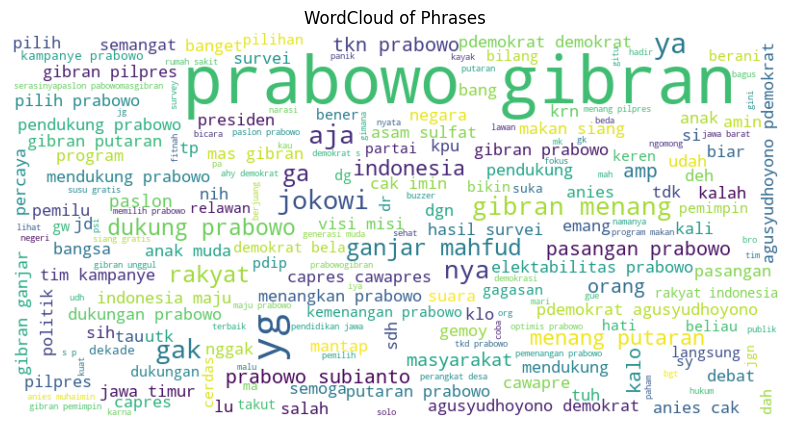

In [48]:
# Visualisasi WordCloud untuk frase
plt.figure(figsize=(10, 5))
plt.imshow(text_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Phrases')
plt.show()

In [49]:
# Calculating the phrase frequency
word_counts = Counter(data['text_processed'])
most_common = word_counts.most_common(20)  # Unveiling the top 10 most frequently used phrases

# Unveiling the most frequently used phrases
print("Phrases that appear most frequently in the tweets:")
print(most_common)

# Calculating the least frequently used phrases
least_common = word_counts.most_common()[:-21:-1]  # Unveiling the 10 least used phrases

# Unveiling the least frequently used hashtags
print("Words that appear least frequently in the tweets:")
print(least_common)

Phrases that appear most frequently in the tweets:
[('prabowo gibran menang putaran', 30), ('prabowo gibran indonesia maju', 18), ('prabowo gibran putaran', 16), ('prabowo gibran', 16), ('ditindak terlibat e ktp budakwanita december', 16), ('', 14), ('keren', 10), ('artikel lengkap', 10), ('organisasi perangkat desa dukung prabowo gibran uu', 9), ('sby instruksikan kader demokrat menangkan prabowo gibran wka agusyudhoyono pdemokrat demokrat bela rakyat', 9), ('sby instruksikan kader demokrat menangkan prabowo gibran ivy agusyudhoyono pdemokrat demokrat belas', 9), ('prabowo gibran menang', 8), ('pilih prabowo gibran', 8), ('ahy tegaskan demokrat kampanye bareng prabowo gibran ocf agusyudhoyono pdemokrat demokrat s p', 8), ('sby instruksikan kader demokrat menangkan prabowo gibran qu agusyudhoyono pdemokrat demokrat s p', 8), ('parah polri terlibat operasi pemenangan prabowo gibran', 7), ('all in prabowo gibran', 7), ('prabowo gibran pasangan kandidat buruk sejarah indonesia modern', 7)

**Insights :**

The list of phrases most frequently appearing in tweets indicates the topics or messages that are most discussed or repeated in this dataset. Some examples include:

1. **'prabowo gibran menang putaran', 'prabowo gibran indonesia maju'** often appear, indicating discussions around support for the victory or developments related to the Prabowo-Gibran duo as presidential and vice-presidential candidates of the Republic of Indonesia.
2. **'prabowo gibran', 'prabowo gibran putaran'** also appear quite frequently, showing a focus in Twitter user conversations on this candidate pair.
3. There are also phrases like **'ditindak terlibat e ktp budakwanita december'** that appear with high frequency, possibly related to an event or topic that was in the spotlight during a specific period.

On the other hand, the least frequent phrases seem to be more varied and specific. They might include opinions or contexts that are less popular or have not been widely discussed in this dataset. Some of these include **'prabowo gibran pemimpin idaman masyarakat indonesia', 'februari prabowo gibran', 'terbaik nih pasangan prabowo gibran love love'**, which might reflect individual views or messages that have not gained widespread attention in the general discussion.

This indicates that in the observed conversations or tweets, there are several themes or messages often highlighted and emphasized by users, while some other topics or views might receive less discussion or attention.

**4.3 Topic Exposure Analysis**

*In this section, we will perform a further analysis regarding the topic/tweets exposure in twitter platform regarding Prabowo-Gibran as the presidential and vice-presidential candidates in the 2024 Indonesian election.*

**4.3.1 Exposure per Date**

In [52]:
# Re-ensuring the 'created_at' feature is in the format of datetime data type
data['created_at'] = pd.to_datetime(data['created_at'])

# Calculating tweets per day
tweet_per_date = data.groupby(data['created_at'].dt.date)['full_text'].count()

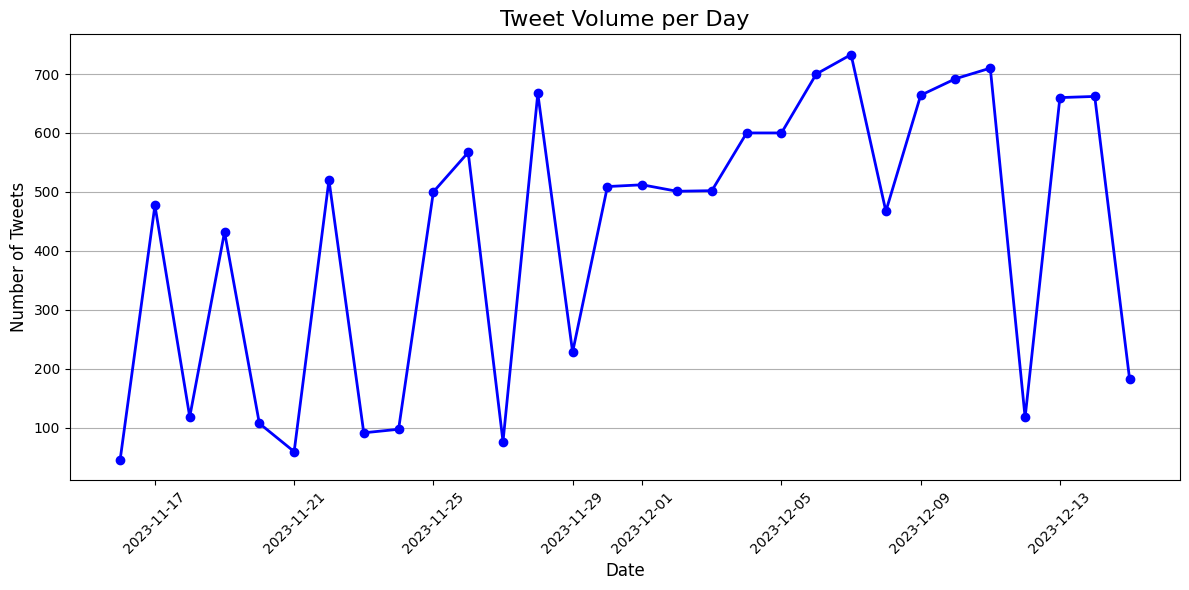

In [53]:
plt.figure(figsize=(12, 6))

# Plotting the tweet volume per day
tweet_per_date.plot(kind='line', marker='o', linestyle='-', color='blue', linewidth=2, markersize=6)

plt.title('Tweet Volume per Day', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Insights:**

1. **Tweet Volume Trend**: There is a significant fluctuation in the daily number of tweets from November 15, 2023, to December 15, 2023. There is a noticeable variation in the number of tweets between specific days.
2. **Increase in Activity**: There is a substantial increase in tweet activity on some days, such as on November 28, December 4-7, and 9-11. This may indicate the occurrence of events or topics that captured attention on these days, leading social media users to be active in discussing or sharing information.
3. **Reduction in Activity**: On certain days, particularly at the beginning of the period (November 15-24), the number of tweets tends to be lower. This could be due to a lack of events or interesting topics that make users less active on social media platforms.
4. **Long-Term Trend**: Overall, there is a trend of increasing tweet numbers over time, especially towards the middle and end of the observation period (from late November to mid-December). However, there is a drastic decrease in the number of tweets on December 15, 2023, which could also be due to a reduction in events or interesting topics related to Prabowo-Gibran's candidacy that make users less active on the Twitter social media platform on that day.

This data provides an overview of the pattern of tweet activity over time, which can help in understanding user participation and interest trends in certain topics or events during the given time frame.

**4.3.2 Exposure per Day**

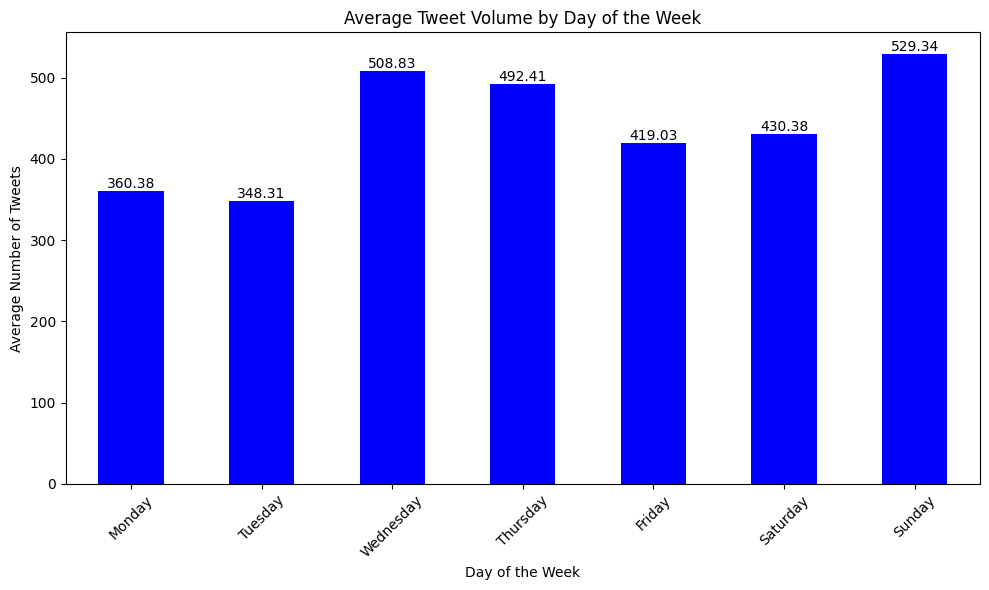

In [57]:
# Map the datetime index to the day of the week (0: Monday, 6: Sunday)
data['day_of_week'] = data['created_at'].dt.dayofweek

# Define the names of the days
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group tweets by day of the week and count the number of tweets for each day
tweets_per_day_count = data.groupby('day_of_week')['full_text'].count().reindex(range(7), fill_value=0)

# Calculate the number of weeks the dataset
num_weeks = (data['created_at'].max() - data['created_at'].min()).days / 7

# Calculate the average number of tweets per day
tweets_per_day_avg = tweets_per_day_count / num_weeks

# Reindex the series with the names of the days
tweets_per_day_avg.index = days

plt.figure(figsize=(10, 6))

# Plotting the average tweet volume per day as a bar plot
tweets_per_day_avg.plot(kind='bar', color='blue')

plt.title('Average Tweet Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Tweets')
plt.xticks(rotation=45)

# Adding labels for each bar
for i, value in enumerate(tweets_per_day_avg.values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

**Insights:**

From the data on the number of tweets based on the day of the week, here are some insights that can be drawn:

1. **Highest Activity in Midweek and Sunday**: The highest average number of tweets is observed on Wednesday, followed by a decrease on Thursday and Friday, and then an increase on Saturday, reaching its peak on Sunday.
2. **Lower Activity at the Start of the Week**: The average number of tweets tends to be lower on Monday and Tuesday, indicating that users are less active at the beginning of the week.
3. **Stability During Midweek Working Days (Wednesday, Thursday)**: There is a stability in the number of tweets on Wednesday and Thursday, which might indicate that users are more active on social media platforms during the midweek period.
4. **Increase in Activity Towards the Weekend**: The number of tweets also tends to increase on Saturday and especially on Sunday, signifying a rise in activity as the weekend approaches.

**4.3.3 Audience Engagement Per Date**

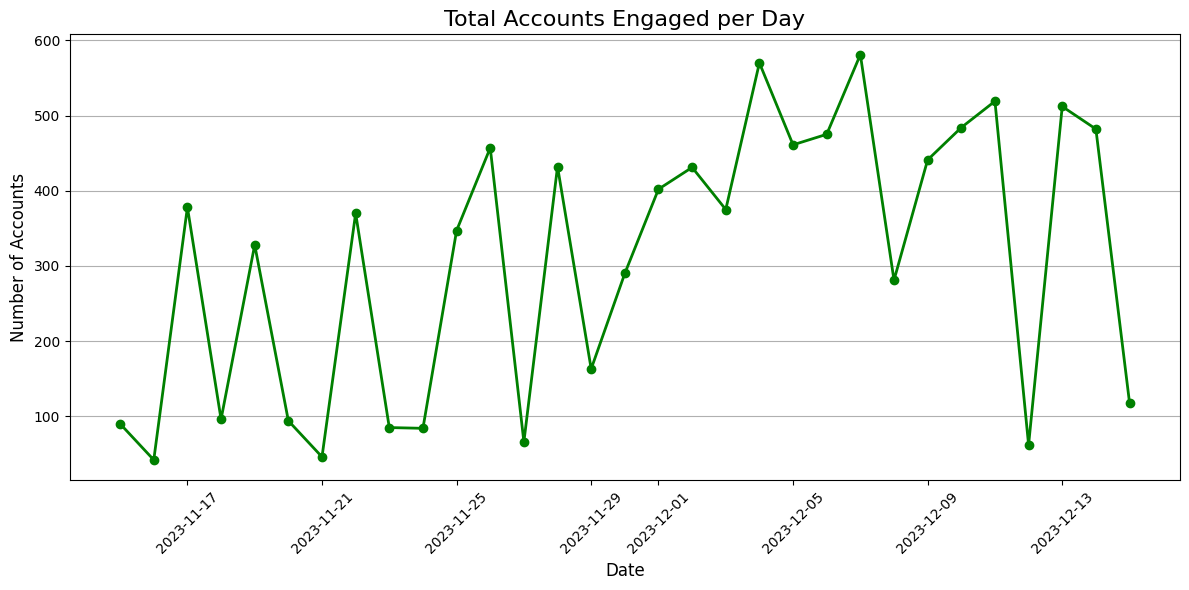

created_at
2023-11-15     90
2023-11-16     42
2023-11-17    378
2023-11-18     96
2023-11-19    328
2023-11-20     94
2023-11-21     46
2023-11-22    370
2023-11-23     85
2023-11-24     84
2023-11-25    347
2023-11-26    457
2023-11-27     66
2023-11-28    432
2023-11-29    163
2023-11-30    290
2023-12-01    402
2023-12-02    431
2023-12-03    375
2023-12-04    570
2023-12-05    461
2023-12-06    475
2023-12-07    581
2023-12-08    281
2023-12-09    441
2023-12-10    484
2023-12-11    519
2023-12-12     62
2023-12-13    512
2023-12-14    482
2023-12-15    118
Name: username, dtype: int64

In [ ]:
# Re-ensuring the 'created_at' feature is in the format of datetime data type
data['created_at'] = pd.to_datetime(data['created_at'])
# Grouping by 'created_at' and counting unique usernames to get the total accounts engaged each day
accounts_per_date = data.groupby(data['created_at'].dt.date)['username'].nunique()

plt.figure(figsize=(12, 6))

# Plotting the total accounts engaged per day
accounts_per_date.plot(kind='line', marker='o', linestyle='-', color='green', linewidth=2, markersize=6)

plt.title('Total Accounts Engaged per Day', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Accounts', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

accounts_per_date

**Insights:**


1. **Fluctuation in Daily Activity:** There is significant fluctuation in the number of accounts involved in the topic on various dates. Some days show a significant spike in participation, while others have a lower level of participation.
2. **Increase and Decrease in Activity:** There are specific periods where there is a sharp increase in participation (December 13th), followed by a decrease in the following days. This indicates a trend of fluctuating user participation in the discussion of the topic.
3. **Activity Peaks:** Certain dates stand out with a high number of involved accounts, whereas others have lower participation. Peaks of activity on specific dates could be focal points for analysis to understand what causes these increases.
4. **Overall Activity Trends:** Overall, there is variation in the number of accounts involved over time. This could indicate varying interest or engagement from users in the topic.

Further analysis may be needed to understand the factors causing these fluctuations and participation trends, as well as how they relate to the topic being discussed.

**4.4 Tweets Sentiment Analysis**

*In this section, we will observe the sentiments initiated by the discussions of topics related to Prabowo-Gibran as the presidential and vice-presidential candidates in the 2024 Indonesian election.*

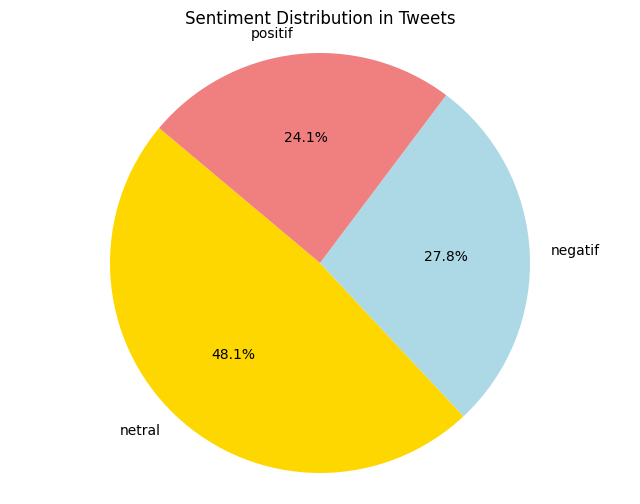

sentiment_label
netral     6199
negatif    3580
positif    3113
Name: count, dtype: int64

In [ ]:
# Calculating the sentiments
sentiment_counts = data['sentiment_label'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
colors = ['gold', 'lightblue', 'lightcoral']

# Creating the pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution in Tweets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

sentiment_counts

**Insights:**

1. **Dominant Sentiment**: The 'Neutral' sentiment appears to be the most frequently occurring among the sentiments represented in the dataset, with 48.1% occurrence. This suggests that the majority of the tweets remain neutral in their sentiment.
2. **Negative Sentiment**: Although the 'Neutral' sentiment is the most common, the 'Negative' sentiment follows with 27.8% occurrence. This indicates a significant presence of negative sentiment in the dataset, possibly highlighting specific issues, concerns, or criticisms.
3. **Positive Sentiment**: The 'Positive' sentiment seems to be the least common among the three, with 24.1% occurrence. Nevertheless, it still represents a substantial portion of the dataset, indicating the presence of positive views or expressions within the dataset.
4. **General Themes**: The dataset appears to encompass a diverse range of sentiments, including neutral, negative, and positive, reflecting a variety of opinions, attitudes, or emotions related to the analyzed content.
5. **Balance vs. Sentiment Tendency**: The larger number of 'Neutral' sentiments might suggest a more balanced or objective perspective in the dataset, while the occurrence of 'Negative' sentiments may indicate the presence of controversial or critical aspects in the dataset. The 'Positive' sentiment, though fewer in number, still contributes a significant portion of positive expression.

Understanding this sentiment distribution helps in assessing the overall sentiment landscape in the dataset, providing initial insights into the nature of sentiments expressed in the analyzed topic.

<Figure size 1000x600 with 0 Axes>

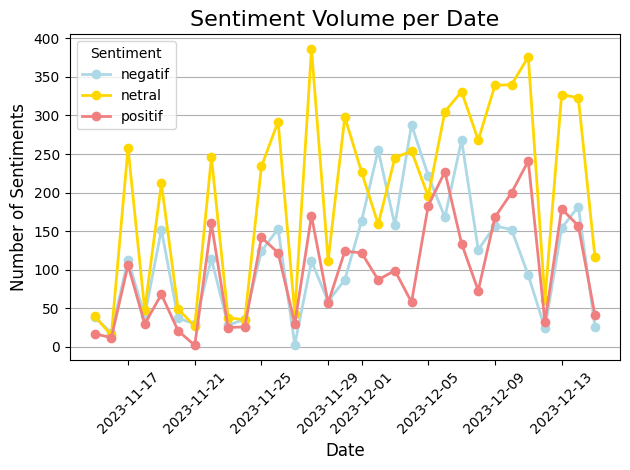

In [ ]:
# Re-ensuring the data types of the dates
data = pd.DataFrame(data)
data['created_at'] = pd.to_datetime(data['created_at']).dt.date

# Group tweets by date and sentiment, then count the number of tweets for each sentiment per date
sentiments_per_date = data.groupby(['created_at', 'sentiment_label']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))

# Adjust the colors of each sentiments
colors = ['lightblue', 'gold', 'lightcoral']

# Plot the line chart as visualization of the data
sentiments_per_date.plot(kind='line', marker='o', linestyle='-', linewidth=2, markersize=6, color=colors)

plt.title('Sentiment Volume per Date', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Sentiments', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


In [ ]:
sentiments_per_date

sentiment_label,negatif,netral,positif
created_at,,,
2023-11-15,39,40,17
2023-11-16,18,15,12
2023-11-17,113,258,106
2023-11-18,40,48,30
2023-11-19,152,212,68
2023-11-20,37,49,21
2023-11-21,30,27,2
2023-11-22,114,246,160
2023-11-23,28,38,25


**Insight:**

1. **Sentiment Fluctuation**: There is fluctuation in the number of sentiments recorded per day. For instance, there is a variation in the number of negative, neutral, and positive sentiments each day from November 15, 2023, to December 15, 2023.
2. **Changes in Sentiment Patterns**: There appears to be a change in sentiment patterns on December 2 and 3, 2023. On 2023-12-02 (December 2, 2023), there was a significant increase in the number of negative sentiments (255) compared to the number of neutral (159) and positive sentiments (87). This change could be due to a relevant event or topic on that date causing a shift in sentiment patterns on December 2 and 3, followed by a change back on December 5 where neutral and positive sentiments again surpassed negative sentiments.
3. **Dominance of Neutral Sentiment**: From the above data, it can be concluded that during the observation period from November 15, 2023, to December 15, 2023, there is a dominance of neutral sentiment in conversations or topics expressed in tweets related to Prabowo-Gibran as Presidential and Vice-Presidential candidates.

**4.5 Twitter Account Analysis**

*In this section, we will observe the twitter accounts engaged to the topics related to Prabowo-Gibran as the presidential and vice-presidential candidates in the 2024 Indonesian election in twitter platform.*

In [ ]:
data

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,VerifiedStatus,FollowersCount,sentiment_label,sentiment_score,hashtag,text_processed,day_of_week
0,2023-11-15,1724940299250827575,@xquitavee @prabowo @gibran_tweet @psi_id @jok...,0,0,0,0,in,1420228891994517507,1724591423444713876,AmirMah36541437,https://twitter.com/AmirMah36541437/status/172...,Not Verified,Follower Count Not Found,netral,0,[],gua nomor salam perubahan,2
1,2023-11-15,1724940167767785893,@yehovarapha_ Boleh gak mutualan sama pendukun...,0,0,0,0,in,781527721,1724770699737444761,numadayana,https://twitter.com/numadayana/status/17249401...,Not Verified,10.5K,negatif,-1,[],gak mutualan pendukung prabowo gibran,2
2,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,golkarpedia,https://twitter.com/golkarpedia/status/1724940...,Not Verified,"2,306",netral,0,"['#airlanggahartarto', '#kuningkeren', '#Prabo...",nurul arifin apresiasi keputusan kpu penetapan...,2
3,2023-11-15,1724939961080991996,@uludagerdi @hariqosatria @prabowo @gibran_twe...,0,0,0,0,in,891872532,1723518365321568366,hagj12,https://twitter.com/hagj12/status/172493996108...,Not Verified,Follower Count Not Found,netral,0,[],no menang,2
4,2023-11-15,1724939341246697524,Saatnya Rakyat memilih untuk Indonesia....Prog...,0,2,9,22,in,1227499861580251136,1724939341246697524,Lembayung071,https://twitter.com/Lembayung071/status/172493...,Not Verified,12.2K,positif,1,['#PrabowoGibran2024'],rakyat memilih indonesia program prioritas pra...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12887,2023-12-15,1735764587679715584,@psi_id 14 Februari 2024 Prabowo Gibran ✌️,0,0,0,0,in,945481436,1735673656259289587,axelbaronn,https://twitter.com/axelbaronn/status/17357645...,Not Verified,Follower Count Not Found,netral,0,[],februari prabowo gibran,4
12888,2023-12-15,1735764448273670198,"Inilah satu contoh NEGARA KEKUASAAN"" yg diseb...",0,0,0,0,in,1641722122874814464,1735764448273670198,Indra1444H,https://twitter.com/Indra1444H/status/17357644...,Not Verified,26,netral,0,[],contoh negara kekuasaan yg aturan hukum kendal...,4
12889,2023-12-15,1735764204051931312,@Beritasatu Prabowo Gibran pemimpin paling tep...,0,0,0,0,in,1598486990994874368,1735537443305402560,Rezaind8,https://twitter.com/Rezaind8/status/1735764204...,Not Verified,Follower Count Not Found,positif,1,[],prabowo gibran pemimpin kesejahteraan masyarakat,4
12890,2023-12-15,1735763927739572503,@Beritasatu Inilah Prabowo Gibran pemimpin ida...,0,0,0,0,in,1598502855467376642,1735537443305402560,AngestiNina,https://twitter.com/AngestiNina/status/1735763...,Not Verified,Follower Count Not Found,positif,1,[],prabowo gibran pemimpin idaman masyarakat indo...,4


**4.5.1 Accounts with Most Tweets**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12892 entries, 0 to 12891
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           12892 non-null  object
 1   id_str               12892 non-null  object
 2   full_text            12892 non-null  object
 3   quote_count          12892 non-null  int64 
 4   reply_count          12892 non-null  int64 
 5   retweet_count        12892 non-null  int64 
 6   favorite_count       12892 non-null  int64 
 7   lang                 12892 non-null  object
 8   user_id_str          12892 non-null  object
 9   conversation_id_str  12892 non-null  object
 10  username             12892 non-null  object
 11  tweet_url            12892 non-null  object
 12  VerifiedStatus       12892 non-null  object
 13  FollowersCount       12892 non-null  object
 14  sentiment_label      12892 non-null  object
 15  sentiment_score      12892 non-null  int64 
 16  hash

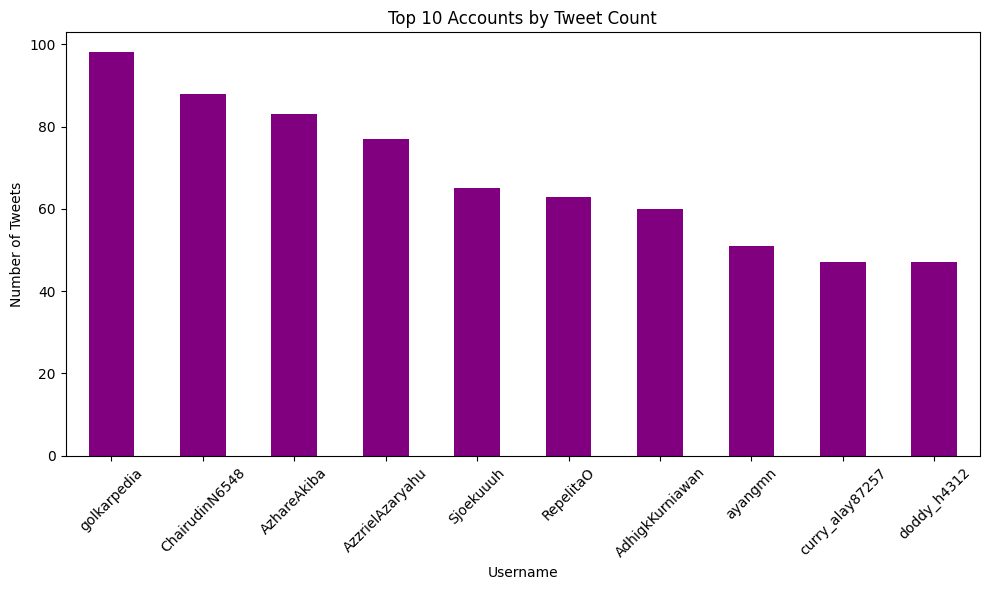

username
golkarpedia        98
ChairudinN6548     88
AzhareAkiba        83
AzzrielAzaryahu    77
Sjoekuuuh          65
                   ..
DesriyantoHeri      1
boodmynded24        1
soblah208           1
HandrianiMirza      1
Indra1444H          1
Name: count, Length: 6866, dtype: int64

In [ ]:
# Calculating the amount of tweets in each account involved in this dataset
tweet_count_per_account = data['username'].value_counts()

# Unveiling 10 Accounts with most tweets
top_10_accounts = tweet_count_per_account.head(10)

# Plotting the barplot
plt.figure(figsize=(10, 6))
top_10_accounts.plot(kind='bar', color='Purple')
plt.title('Top 10 Accounts by Tweet Count')
plt.xlabel('Username')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

tweet_count_per_account

**Insight:**

The data above shows the number of tweets per Twitter user account involved in discussions or tweets related to the Prabowo-Gibran candidate duo. Here are some insights that can be drawn from this data:

1. **Focused Activity on a Limited Number of Accounts:** The majority of participation in the discussion is concentrated on a smaller number of accounts. For example, there are some accounts that contribute a significant number of tweets such as golkarpedia (98 tweets), ChairudinN6548 (88 tweets), AzhareAkiba (83 tweets), AzzrielAzaryahu (77 tweets), and Sjoekuuuh (65 tweets).
2. **Consistency and High Engagement:** Accounts with a high number of tweets show consistent involvement in the discussion. This might indicate a high level of interest or engagement from these accounts on the topic being discussed.
3. **Proportional Increase in Engagement:** There is a proportional decrease in the number of tweets when moving to accounts with fewer tweets. In terms of comparison, many accounts only contribute a relatively small number of tweets (possibly just one or a few).
4. **Diverse User Involvement:** The data indicates that a large number of Twitter users (6,866 Twitter Accounts) are involved in the discussion about the Prabowo-Gibran candidate duo. This shows a fairly diverse interest and participation from various user accounts.
5. **Role of Accounts with Fewer Tweets:** Although the number of tweets from some accounts may be small, their role is also important in enriching the variety of opinions and views in the ongoing discussion.

Furthermore, to see how influential Twitter accounts with the most tweets are, we can observe this through the calculation of the average engagement per tweet.

**4.5.2 Accounts with Most Followers**

In [ ]:
# Identifying the unique values in FollowersCount
unique_followers_count = data['FollowersCount'].nunique()
print("Number of unique follower counts:", unique_followers_count)

Number of unique follower counts: 1417


In [ ]:
# Unveiling unique values in FollowersCount 
unique_followers_count = data['FollowersCount'].unique()
unique_followers_count

array(['Follower Count Not Found', '10.5K', '2,306', ..., '989.1K',
       '1,192', '5,473'], dtype=object)

The occurrence of "followers count not found" might result from issues during the scraping process, possibly due to difficulties in locating the account username. This occurrence could imply instances where the account has changed its username.

Consequently, instances where the follower count is not found will be handled as missing values (NaN). Moreover, follower counts indicated with 'K' and 'M' symbols, representing thousands and millions in object form respectively, need to be converted into integer or float format for subsequent analysis.

In [ ]:
# Replace 'Follower Count Not Found' with NaN
data['FollowersCount'] = data['FollowersCount'].replace('Follower Count Not Found', np.nan)

In [ ]:
# Initiating a function to convert some followers count values
def convert_followers_count(FollowersCount):
    if isinstance(FollowersCount, float):
        return FollowersCount
    elif 'K' in FollowersCount: # Converting K in followers count into thousands in integer form
        return int(float(FollowersCount.replace('K', '').replace(',', '')) * 1000)
    elif 'M' in FollowersCount: # Converting M in followers count into millions in integer form
        return int(float(FollowersCount.replace('M', '').replace(',', '')) * 1000000)
    else:
        return int(FollowersCount.replace(',', '')) # Deleting the comma (,) in followers count

data['FollowersCount'] = data['FollowersCount'].map(convert_followers_count)

In [ ]:
# Calculating the amount of followers in each account involved in this dataset
top_10_followers = data.groupby('username')['FollowersCount'].max().nlargest(10)

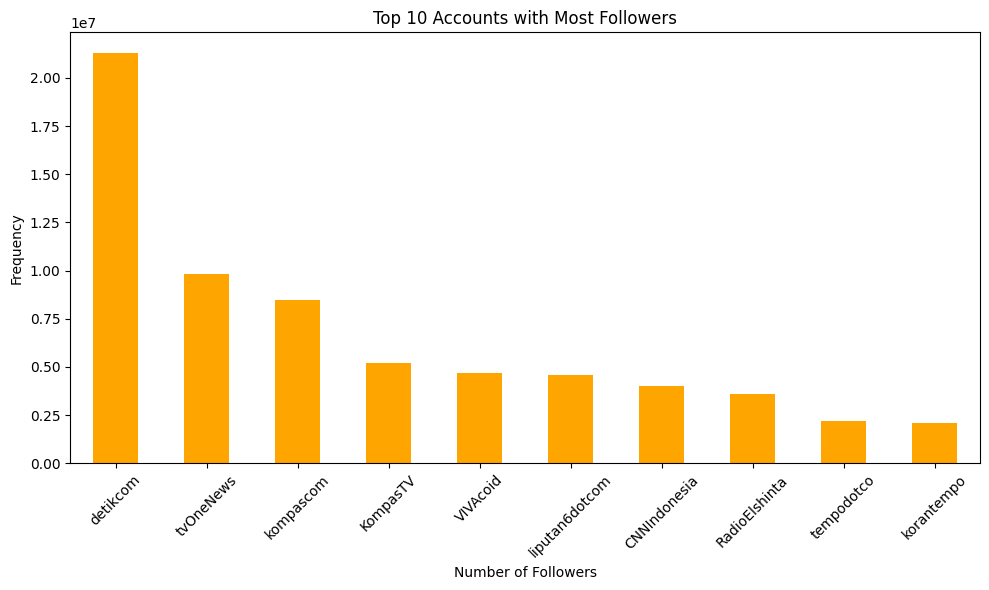

username
detikcom          21300000.0
tvOneNews          9800000.0
kompascom          8500000.0
KompasTV           5200000.0
VIVAcoid           4700000.0
liputan6dotcom     4600000.0
CNNIndonesia       4000000.0
RadioElshinta      3600000.0
tempodotco         2200000.0
korantempo         2100000.0
Name: FollowersCount, dtype: float64

In [ ]:
# Plotting the barplot
plt.figure(figsize=(10, 6))
top_10_followers.plot(kind='bar', color='Orange')
plt.title('Top 10 Accounts with Most Followers')
plt.xlabel('Number of Followers')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_10_followers

**Insights:**

From the data on usernames with the most followers, it is evident that detikcom has the highest number of followers, approximately 21.3 million, followed by tvOneNews with about 9.8 million followers, and then kompascom with around 8.5 million followers. With such high follower counts, these usernames have significant potential to reach a wide audience in disseminating certain information or messages.

This indicates that these accounts have a considerable influence on social media platforms, so the messages or information they convey have a high likelihood of being widely disseminated and attracting public attention. The significant number of followers can also be an indication of the credibility and influence of these media or platforms in shaping public opinion.

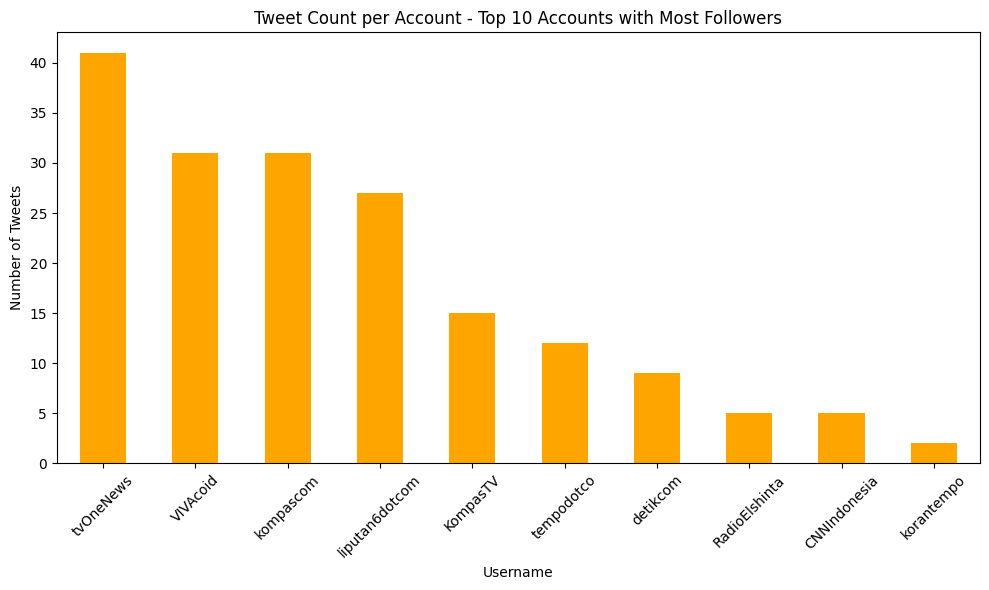

username
tvOneNews         41
VIVAcoid          31
kompascom         31
liputan6dotcom    27
KompasTV          15
tempodotco        12
detikcom           9
RadioElshinta      5
CNNIndonesia       5
korantempo         2
Name: count, dtype: int64

In [ ]:
# Filtering the data to 10 accounts with most followers
top_10_followers_accounts = top_10_followers.index

# Calculating the total tweets of each accounts
tweet_count_top_10_followers = data[data['username'].isin(top_10_followers_accounts)]['username'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
tweet_count_top_10_followers.plot(kind='bar', color='Orange')
plt.title('Tweet Count per Account - Top 10 Accounts with Most Followers')
plt.xlabel('Username')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

tweet_count_top_10_followers

**Insights:**

1. **Dominance in Platform Activity:** The account TVOneNews leads with a significantly higher number of tweets compared to other accounts. This indicates a high level of activity or engagement from TVOneNews on the Twitter platform in the context of topics or events related to "Prabowo-Gibran".
2. **Significant Participation:** VIVAcoid, kompascom, and liputan6dotcom have a considerable number of tweets, though not as many as TVOneNews and the 10 Twitter accounts with the most tweets. This shows the high involvement of these accounts in disseminating information or content related to the candidacy of Prabowo-Gibran for President and Vice President of the Republic of Indonesia to their followers.
3. **Variation in Activity:** There is a variation in the number of tweets between KompasTV, tempodotco, and detikcom. Despite being among the 10 accounts with the most followers, their tweet count is lower compared to others in this list. This might indicate a variation in Twitter usage strategies or different content focus.

**4.5.3 The Engagement Comparisons of Most Tweets and Most Followed Twitter Accounts**

The average engagement of the account golkarpedia is: 55.57
The average engagement of the account ChairudinN6548 is: 9.93
The average engagement of the account AzhareAkiba is: 10.01
The average engagement of the account AzzrielAzaryahu is: 10.01
The average engagement of the account Sjoekuuuh is: 0.00
The average engagement of the account RepelitaO is: 0.44
The average engagement of the account AdhigkKurniawan is: 13.05
The average engagement of the account ayangmn is: 0.00
The average engagement of the account curry_alay87257 is: 0.00
The average engagement of the account doddy_h4312 is: 10.01


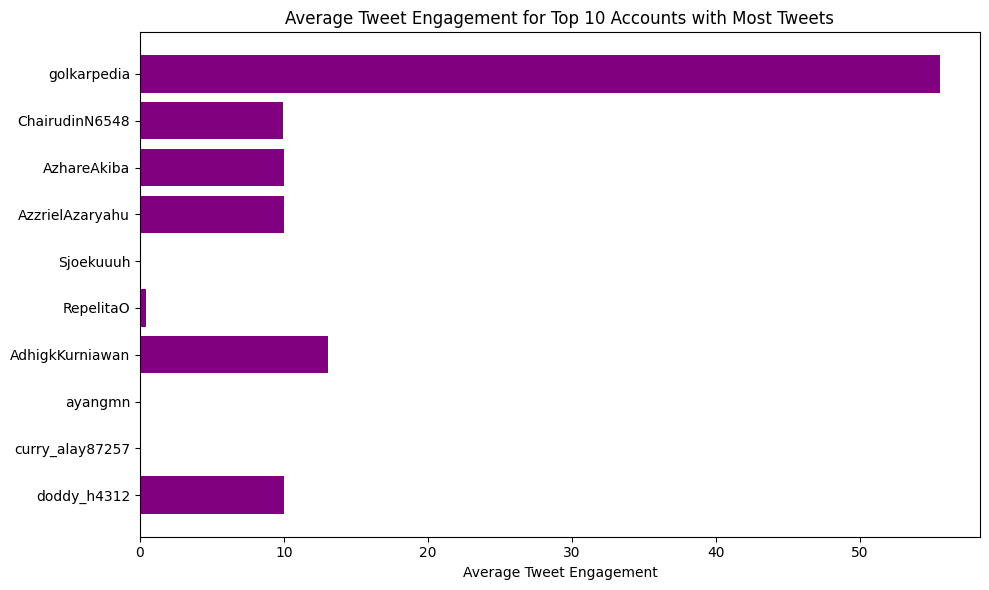

In [ ]:
# Calculate tweet engagement for each account
data['tweet_engagement'] = data['retweet_count'] * 1.0 + data['favorite_count'] * 0.5 + data['reply_count'] * 13.5

# Calculate total tweets for each account
tweet_count_per_account = data['username'].value_counts()

# Combine tweet engagement and total tweets into a new DataFrame
account_summary = pd.DataFrame({'total_tweet': tweet_count_per_account, 'tweet_engagement': data.groupby('username')['tweet_engagement'].sum()})

# Sort the accounts based on total tweets and select the top 10
top_accounts = account_summary.sort_values('total_tweet', ascending=False).head(10)

# Calculate the average engagement for the top 10 accounts
average_engagement = top_accounts['tweet_engagement'] / top_accounts['total_tweet']

# Display the average engagement for the top 10 accounts
for username, avg_engagement in zip(top_accounts.index, average_engagement):
    print(f"The average engagement of the account {username} is: {avg_engagement:.2f}")
# Plotting the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_accounts.index, average_engagement, color='Purple')
plt.xlabel('Average Tweet Engagement')
plt.title('Average Tweet Engagement for Top 10 Accounts with Most Tweets')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest tweet on top
plt.tight_layout()
plt.show()

username
detikcom           209.222222
tvOneNews         1075.146341
kompascom          303.612903
KompasTV           341.433333
VIVAcoid          1598.080645
liputan6dotcom     502.092593
CNNIndonesia       152.900000
RadioElshinta       14.500000
tempodotco         548.291667
korantempo        5374.250000
Name: avg_engagement_per_tweet, dtype: float64


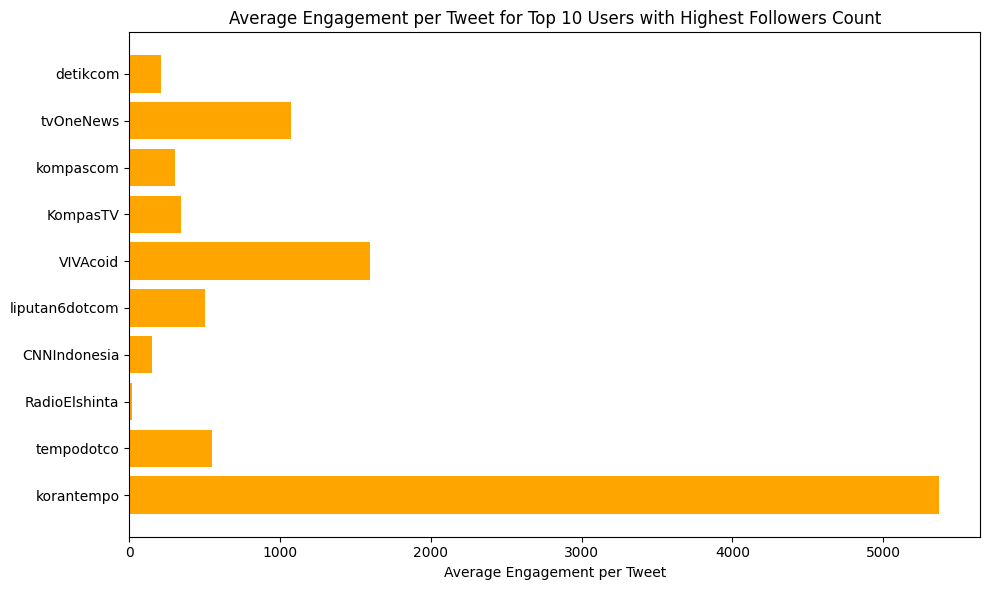

In [ ]:
# Group data by username and calculate total engagements and total followers for each user
user_summary = data.groupby('username').agg({'tweet_engagement': 'sum', 'FollowersCount': 'max'})

# Sort users based on followers count and select the top 10
top_10_users = user_summary.sort_values('FollowersCount', ascending=False).head(10)

# Calculate average engagement per tweet for the top 10 users
top_10_users['avg_engagement_per_tweet'] = top_10_users['tweet_engagement'] / data[data['username'].isin(top_10_users.index)].groupby('username').size()

# Display the average engagement per tweet for the top 10 users
print(top_10_users['avg_engagement_per_tweet'])

# Plotting the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_users.index, top_10_users['avg_engagement_per_tweet'], color='Orange')
plt.xlabel('Average Engagement per Tweet')
plt.title('Average Engagement per Tweet for Top 10 Users with Highest Followers Count')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Insight:**

1. **Number of Followers Has a More Significant Impact:** Twitter accounts with a high number of followers (Verified Accounts) tend to achieve higher engagement compared to Twitter accounts with the most tweets.
2. **Variation in Engagement Among Accounts:** The fluctuation in engagement levels among accounts in both categories indicates that engagement does not always directly correlate with the number of followers or the number of tweets posted. Other factors such as content quality, follower involvement, or communication strategy also influence engagement levels.

**4.5.4 Accounts With Most Positive Tweets**

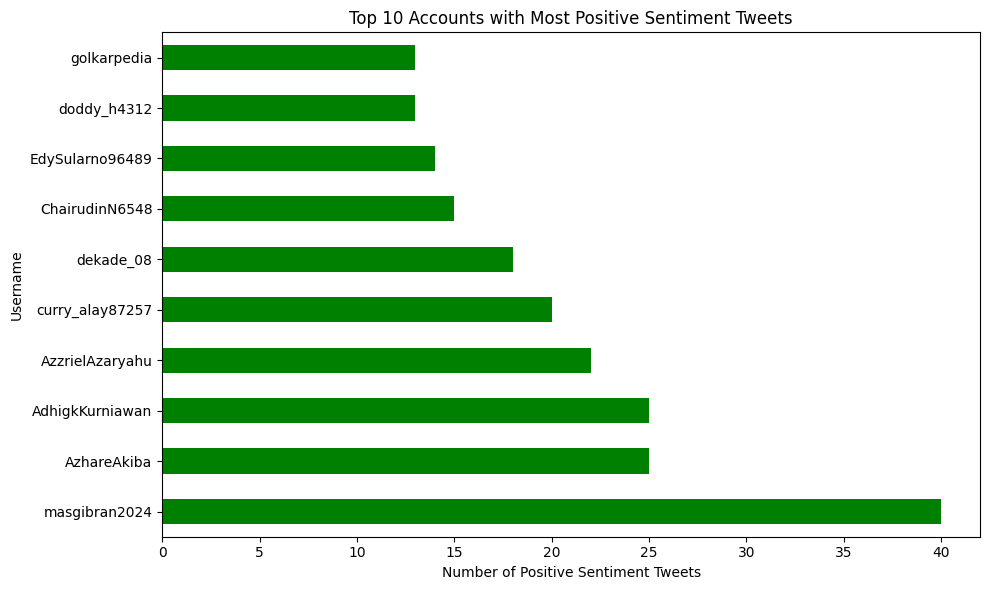

username
masgibran2024      40
AzhareAkiba        25
AdhigkKurniawan    25
AzzrielAzaryahu    22
curry_alay87257    20
dekade_08          18
ChairudinN6548     15
EdySularno96489    14
doddy_h4312        13
golkarpedia        13
Name: count, dtype: int64

In [ ]:
# Filter the data for positive sentiment
positive_sentiment_data = data[data['sentiment_label'] == 'positif']

# Calculate the number of positive sentiment tweets per account
positive_sentiment_counts = positive_sentiment_data['username'].value_counts()

# Display the top accounts with the most positive sentiment tweets
top_accounts_positive_sentiment = positive_sentiment_counts.head(10)

plt.figure(figsize=(10, 6))

# Plotting the top accounts with positive sentiment tweets
top_accounts_positive_sentiment.plot(kind='barh', color='green')

plt.title('Top 10 Accounts with Most Positive Sentiment Tweets')
plt.xlabel('Number of Positive Sentiment Tweets')
plt.ylabel('Username')
plt.tight_layout()
plt.show()

top_accounts_positive_sentiment

**Insights:**

1. **Mas Gibran 2024 Records the Highest Number:** The account "masgibran2024" leads in the number of positive sentiment tweets with 40 tweets. This indicates a high level of involvement or positive response to certain topics or content related to the Prabowo-Gibran candidate duo.
2. **Variety in Account Contributions:** There is variation in the contribution of positive tweets from several accounts. Some accounts like AzhareAkiba, AdhigkKurniawan, and AzzrielAzaryahu are also active in spreading positive sentiments related to the same topic.
3. **Diversification of Participation:** The data shows a fairly diverse participation from a number of accounts in spreading positive sentiments. This indicates various perspectives or opinions that support or respond positively to the discussed topic.
4. **Involvement of Individual Accounts:** It's possible that accounts with a lower number of positive tweets also play an important role in disseminating positive sentiments related to this topic.

**4.5.5 Accounts with Most Netral Tweets**

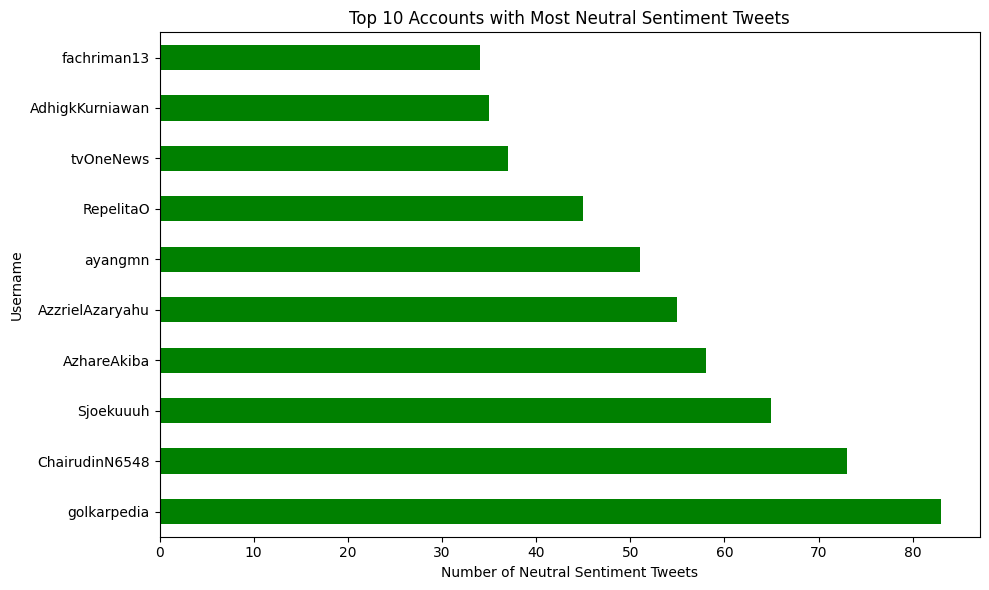

username
golkarpedia        83
ChairudinN6548     73
Sjoekuuuh          65
AzhareAkiba        58
AzzrielAzaryahu    55
ayangmn            51
RepelitaO          45
tvOneNews          37
AdhigkKurniawan    35
fachriman13        34
Name: count, dtype: int64

In [ ]:
# Filter the data for positive sentiment
neutral_sentiment_data = data[data['sentiment_label'] == 'netral']

# Calculate the number of positive sentiment tweets per account
neutral_sentiment_counts = neutral_sentiment_data['username'].value_counts()

# Display the top accounts with the most positive sentiment tweets
top_accounts_neutral_sentiment = neutral_sentiment_counts.head(10)

plt.figure(figsize=(10, 6))

# Plotting the top accounts with neutral sentiment tweets
top_accounts_neutral_sentiment.plot(kind='barh', color='green')

plt.title('Top 10 Accounts with Most Neutral Sentiment Tweets')
plt.xlabel('Number of Neutral Sentiment Tweets')
plt.ylabel('Username')
plt.tight_layout()
plt.show()

top_accounts_neutral_sentiment

**Insights:**

1. **Golkarpedia & ChairudinN6548 Have the Highest Contributions:** The accounts "golkarpedia" and "ChairudinN6548" dominate with a high number of neutral sentiment tweets, contributing 83 and 73 tweets, respectively. These accounts may play a significant role in disseminating neutral information related to the topic being discussed.
2. **Variety of Contributions from Other Accounts:** Besides the top two accounts, there are several other accounts like "Sjoekuuuh", "AzhareAkiba", and "AzzrielAzaryahu" that also contribute a significant number of neutral sentiment tweets.
3. **Importance of Neutral Sentiment in Discussions:** Neutral sentiment also plays a key role in presenting objective or neutral information about a specific topic. This indicates an effort to spread information without a particular opinion bias.

**4.5.6 Accounts with Most Negative Tweets**

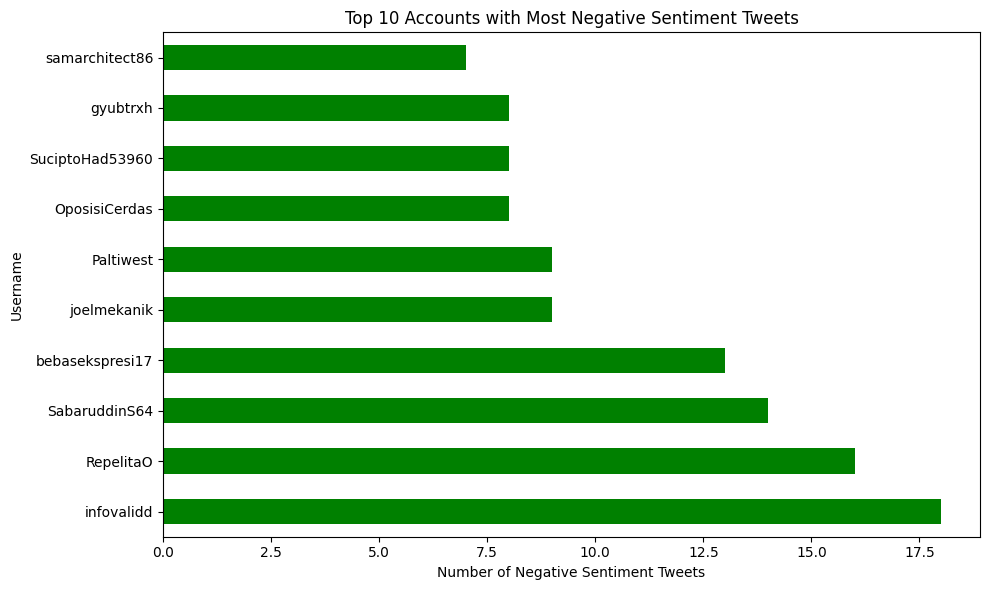

username
infovalidd         18
RepelitaO          16
SabaruddinS64      14
bebasekspresi17    13
joelmekanik         9
Paltiwest           9
OposisiCerdas       8
SuciptoHad53960     8
gyubtrxh            8
samarchitect86      7
Name: count, dtype: int64

In [ ]:
# Filter the data for positive sentiment
negative_sentiment_data = data[data['sentiment_label'] == 'negatif']

# Calculate the number of positive sentiment tweets per account
negative_sentiment_counts = negative_sentiment_data['username'].value_counts()

# Display the top accounts with the most positive sentiment tweets
top_accounts_negative_sentiment = negative_sentiment_counts.head(10)

plt.figure(figsize=(10, 6))

# Plotting the top accounts with Negative sentiment tweets
top_accounts_negative_sentiment.plot(kind='barh', color='green')

plt.title('Top 10 Accounts with Most Negative Sentiment Tweets')
plt.xlabel('Number of Negative Sentiment Tweets')
plt.ylabel('Username')
plt.tight_layout()
plt.show()

top_accounts_negative_sentiment

**Insights:**

1. **Accounts Infovalidd & RepelitaO Have the Most Negative Sentiment Tweets:** The accounts "infovalidd" and "RepelitaO" are the two accounts with the highest number of negative sentiment tweets, contributing 18 and 16 tweets, respectively. These accounts likely make a significant contribution related to the negative sentiment towards the discussed topic.
2. **Context of Negative Sentiment in Discussion:** Contributions of negative sentiment can also play a role in highlighting various viewpoints or issues in the ongoing discussion.

**4.6 Social Network Analysis (SNA)**

In [85]:
# Import Library
!pip install networkx

In [86]:
!pip install community

In [87]:
import networkx as nx
import re
import community as community_louvain

**4.6.1 SNA of Top Engagement Accounts**

In [88]:
# Investigating account with highest engagement score
top_engagement_account = data.groupby('username')['tweet_engagement'].mean().idxmax()
top_engagement_account

'adearmando61'

**Investigating Accounts with Most Interactions with adearmando61**

In [120]:
# Filters the interactions related to adearmando61
interactions_top_account = data[data['full_text'].str.contains(f"@{top_engagement_account}", na=False)]

# Calculating the sum of retweets and replies based on the accounts interactions
top_interactors = interactions_top_account.groupby('username').agg({
    'retweet_count': 'sum',
    'reply_count': 'sum'
}).reset_index()

# Sorting the top interactors
top_interactors_sorted = top_interactors.sort_values(by=['retweet_count', 'reply_count'], ascending=False)

# Making an Exceptions to not showing adearmando in the datas
top_interactors_filtered = top_interactors_sorted[top_interactors_sorted['username'] != top_engagement_account]

top_interactors_filtered

,username,retweet_count,reply_count
16,EffendiRistriy1,6,3
31,Munir_Timur,5,0
87,waroenk_koffee,3,0
26,Kang_Cepot,1,1
9,BaraTeras10969,1,0
...,...,...,...
81,shandy_andre,0,0
83,snakeonthebed,0,0
84,soak438321,0,0
85,sundanga_1,0,0


In [90]:
# Save the DataFrame to an Excel file
top_interactors_filtered.to_excel('adearmando61_interactors.xlsx', index=False)

In [92]:
interactor_engagement = pd.read_csv(r'C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\SNA_Datasets\adearmando61_interactors.csv',delimiter=',')
interactor_engagement

,username,retweet_count,reply_count
0,EffendiRistriy1,6,3
1,Munir_Timur,5,0
2,waroenk_koffee,3,0
3,Kang_Cepot,1,1
4,BaraTeras10969,1,0
...,...,...,...
84,shandy_andre,0,0
85,snakeonthebed,0,0
86,soak438321,0,0
87,sundanga_1,0,0


**Creating Nodes Dataframe**

In [93]:
# Create a set of all unique users for nodes, including 'adearmando'
unique_users = set(interactor_engagement['username'].unique())

unique_users

{'1yagmurdelisii',
 'AdjaCapoek',
 'AhlisWae',
 'Albyadyiatna',
 'Antonyy_10',
 'Ardians24224357',
 'ArnoldS81008357',
 'Asmaragadjyry',
 'AubreyA09848898',
 'BaraTeras10969',
 'BeckhamArmy',
 'Benlizp',
 'BiruBir26073179',
 'ChriestyanK',
 'CjHarto',
 'DameulE40825',
 'EffendiRistriy1',
 'EkoEkobigcity',
 'ExclusiveBstrd',
 'FahrulMch',
 'FarahNathan24',
 'GerardVanny',
 'Haydhar3',
 'Hegie_bae',
 'IsrajabMuhammad',
 'Joker_Wedoks',
 'Kang_Cepot',
 'Kelvin_Sewwotz',
 'LanangJagad31',
 'MarvinNTedjo',
 'Mr_PrasT_Jr',
 'Munir_Timur',
 'Nightingaler02',
 'ParapatYohanes',
 'Pe_Enestee',
 'RaakezOnline',
 'RaiTj001',
 'Rakha_boumi',
 'SabaruddinS64',
 'SuLastr82560729',
 'SuciptoHad53960',
 'Syahrull_021',
 'Tatto26141368',
 'WinSamb',
 'Yadiwiyanto1',
 'YarsidM',
 'YonathanMichael',
 'ZanuAriel',
 'abdul_waringin',
 'ada_solusi',
 'al_tiawan',
 'amot_kadundon',
 'berkahsentosa02',
 'bud1_f1',
 'chris_edwardi',
 'dangiangkuning1',
 'dean_deanlova',
 'deddyyunarto',
 'devcepi60',
 'fathree

In [94]:
# Create nodes DataFrame
nodes = pd.DataFrame({
    'Id': list(unique_users),
    'Label': list(unique_users)
})

nodes

,Id,Label
0,fwsetyawan,fwsetyawan
1,Yadiwiyanto1,Yadiwiyanto1
2,fauziafief21,fauziafief21
3,devcepi60,devcepi60
4,AdjaCapoek,AdjaCapoek
...,...,...
84,ArnoldS81008357,ArnoldS81008357
85,sebastian161259,sebastian161259
86,RaakezOnline,RaakezOnline
87,kumur69,kumur69


In [95]:
nodes.to_csv('adearmando_nodes.csv',index=False)

In [100]:
nodes_df = pd.read_csv(r"C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\SNA_Datasets\adearmando_nodes.csv",delimiter=',')
nodes_df

,Id,Label
0,fwsetyawan,fwsetyawan
1,Yadiwiyanto1,Yadiwiyanto1
2,fauziafief21,fauziafief21
3,devcepi60,devcepi60
4,AdjaCapoek,AdjaCapoek
...,...,...
84,ArnoldS81008357,ArnoldS81008357
85,sebastian161259,sebastian161259
86,RaakezOnline,RaakezOnline
87,kumur69,kumur69


**Creating The Edges**

In [96]:
# Create edges DataFrame for retweets and replies to 'adearmando'
edges_data = []
for i, row in interactor_engagement.iterrows():
    # Add an edge for each retweet to 'adearmando'
    if row['retweet_count'] > 0:
        edges_data.append({
            'Source': row['username'],
            'Target': 'adearmando',
            'Type': 'Directed',
            'Id': f"{row['username']}_to_adearmando_retweet",
            'Weight': row['retweet_count']
        })
    # Add an edge for each reply to 'adearmando'
    if row['reply_count'] > 0:
        edges_data.append({
            'Source': row['username'],
            'Target': 'adearmando',
            'Type': 'Directed',
            'Id': f"{row['username']}_to_adearmando_reply",
            'Weight': row['reply_count']
        })

# Create edges DataFrame
edges = pd.DataFrame(edges_data)
edges

,Source,Target,Type,Id,Weight
0,EffendiRistriy1,adearmando,Directed,EffendiRistriy1_to_adearmando_retweet,6
1,EffendiRistriy1,adearmando,Directed,EffendiRistriy1_to_adearmando_reply,3
2,Munir_Timur,adearmando,Directed,Munir_Timur_to_adearmando_retweet,5
3,waroenk_koffee,adearmando,Directed,waroenk_koffee_to_adearmando_retweet,3
4,Kang_Cepot,adearmando,Directed,Kang_Cepot_to_adearmando_retweet,1
5,Kang_Cepot,adearmando,Directed,Kang_Cepot_to_adearmando_reply,1
6,BaraTeras10969,adearmando,Directed,BaraTeras10969_to_adearmando_retweet,1
7,FarahNathan24,adearmando,Directed,FarahNathan24_to_adearmando_retweet,1
8,Rakha_boumi,adearmando,Directed,Rakha_boumi_to_adearmando_retweet,1
9,YarsidM,adearmando,Directed,YarsidM_to_adearmando_retweet,1


In [97]:
edges.to_csv('adearmando_edges.csv',index=False)

In [101]:
edges_df = pd.read_csv(r"C:\BootcampHacktiv8\sentiment-webscrape\twitter_sentiment_analysis\SNA_Datasets\adearmando_edges.csv",delimiter=',')
edges_df

,Source,Target,Type,Id,Weight
0,EffendiRistriy1,adearmando,Directed,EffendiRistriy1_to_adearmando_retweet,6
1,EffendiRistriy1,adearmando,Directed,EffendiRistriy1_to_adearmando_reply,3
2,Munir_Timur,adearmando,Directed,Munir_Timur_to_adearmando_retweet,5
3,waroenk_koffee,adearmando,Directed,waroenk_koffee_to_adearmando_retweet,3
4,Kang_Cepot,adearmando,Directed,Kang_Cepot_to_adearmando_retweet,1
5,Kang_Cepot,adearmando,Directed,Kang_Cepot_to_adearmando_reply,1
6,BaraTeras10969,adearmando,Directed,BaraTeras10969_to_adearmando_retweet,1
7,FarahNathan24,adearmando,Directed,FarahNathan24_to_adearmando_retweet,1
8,Rakha_boumi,adearmando,Directed,Rakha_boumi_to_adearmando_retweet,1
9,YarsidM,adearmando,Directed,YarsidM_to_adearmando_retweet,1


**SNA Visualization**

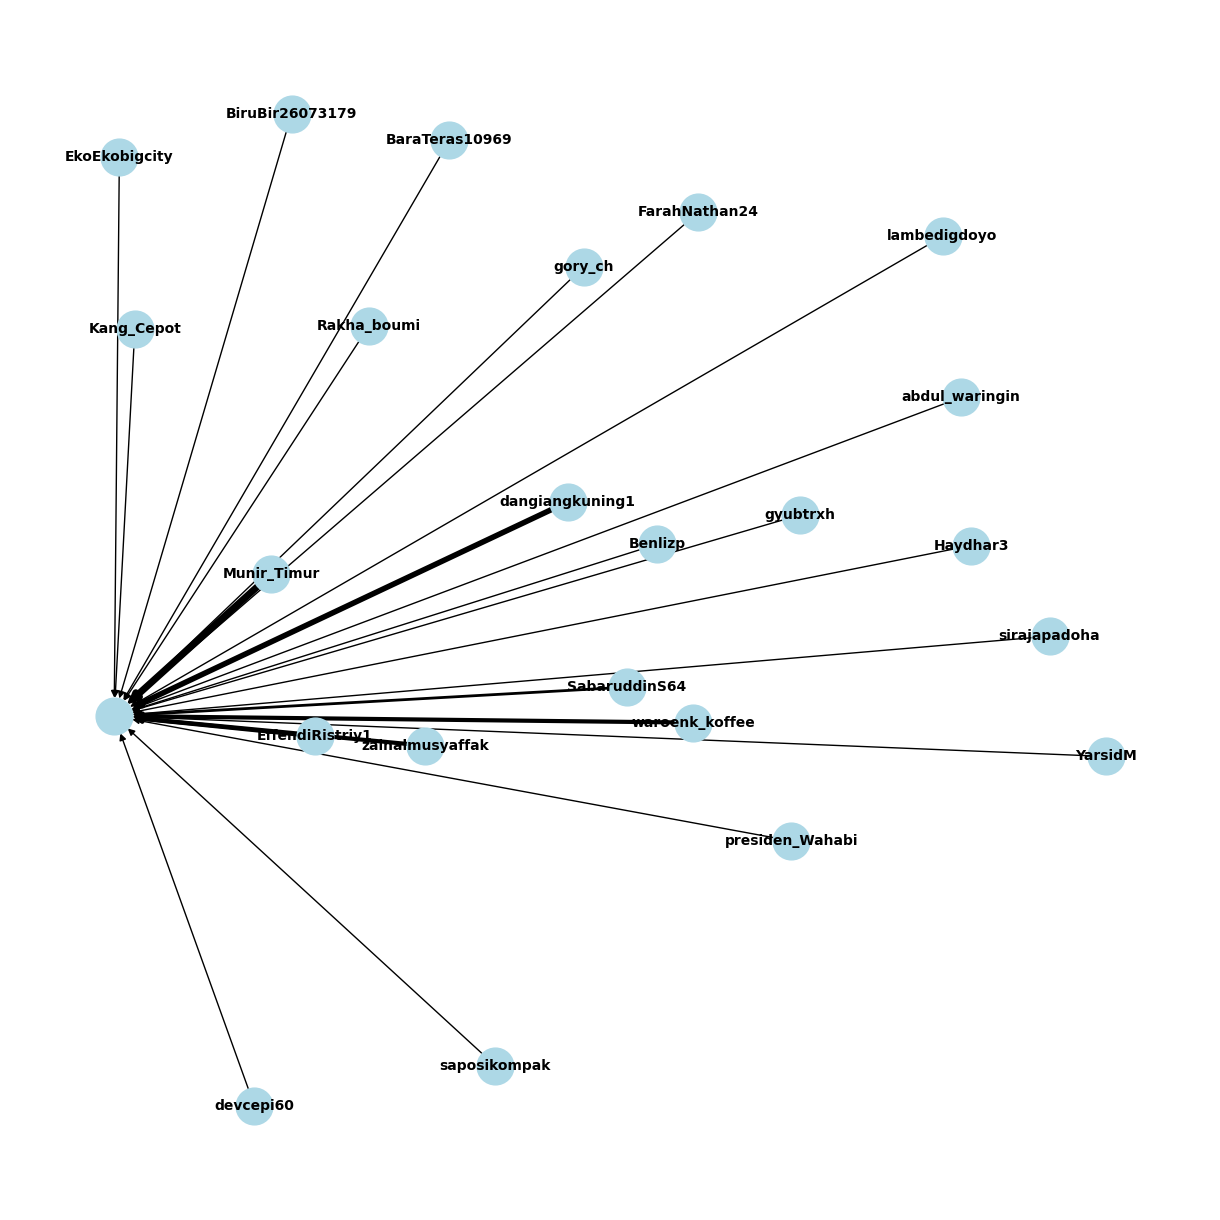

In [102]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
for index, row in nodes_df.iterrows():
    G.add_node(row['Id'], label=row['Label'])

# Add edges to the graph
for index, row in edges_df.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

# Remove isolated nodes
isolated = list(nx.isolates(G))
G.remove_nodes_from(isolated)

# Generate positions for the nodes
pos = nx.spring_layout(G, k=0.15, iterations=20)

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'),
        node_size=700, node_color='lightblue', font_size=10, font_weight='bold',
        width=list(nx.get_edge_attributes(G, 'weight').values()))

# Show the plot
plt.show()

**4.6.2 SNA of Accounts with Most Interactions with Prabowo Official Twitter Accounts**

In [109]:
# Filter interactions that mention Prabowo
mentions_prabowo = data[data['full_text'].str.contains('@prabowo')]

# Count the number of mentions
top_prabowo_mentioners = mentions_prabowo['username'].value_counts().nlargest(50)
top_prabowo_mentioners

username
gyubtrxh           28
benoalatawii       28
becaseimbibo       20
believoadores      17
beliedr4uhI        16
EdySularno96489    16
drReUtari08        15
OktavianusYahy1    13
BenignVisionary    12
1yagmurdelisii     12
bemysuerose        12
HanyaKulitinta     11
bengkeldodo        11
Gojokaisen86       10
kangwanto_tpd      10
abidin_shabir       9
Nightingaler02      9
apelo35             8
don_muzakir_        8
1ojcrm1             8
gyhhh610            8
BoediTomo19         8
pettasewa1          8
ChriestyanK         8
bdrrryyy33          8
NcangBeni           7
bdb56vr             7
bdriirwsk           7
rkrijuara           7
denihartono513      7
Guard31Tony         7
dsvwaikdjns         6
bbtjkiy             6
PrabowogibranN      6
beckykelcmyli       6
OmpungGuru          6
sandalujan65113     6
TuankuNanSati       6
bedydensi           6
ruyasagit900        6
jonacatt            6
jogjaplaza          6
apelo334            6
ellenhans65         6
Sakri644115         6
B

In [110]:
top_prabowo_mentioners.to_excel('top_prabowo_mentioners.xlsx', index=False)

In [119]:
# Filtering interactions related to the top 10 accounts with the most mentions of Prabowo
top_10_accounts = top_prabowo_mentioners.head(10).index.tolist()
interactions_top_10_prabowo = data[data['username'].isin(top_10_accounts)]

# Calculating the Sum of Replies and Retweets for Each of These Top Accounts
top_interactors_with_top10 = interactions_top_10_prabowo.groupby('username').agg({
    'retweet_count': 'sum',
    'reply_count': 'sum'
}).sort_values(by=['retweet_count', 'reply_count'], ascending=False)

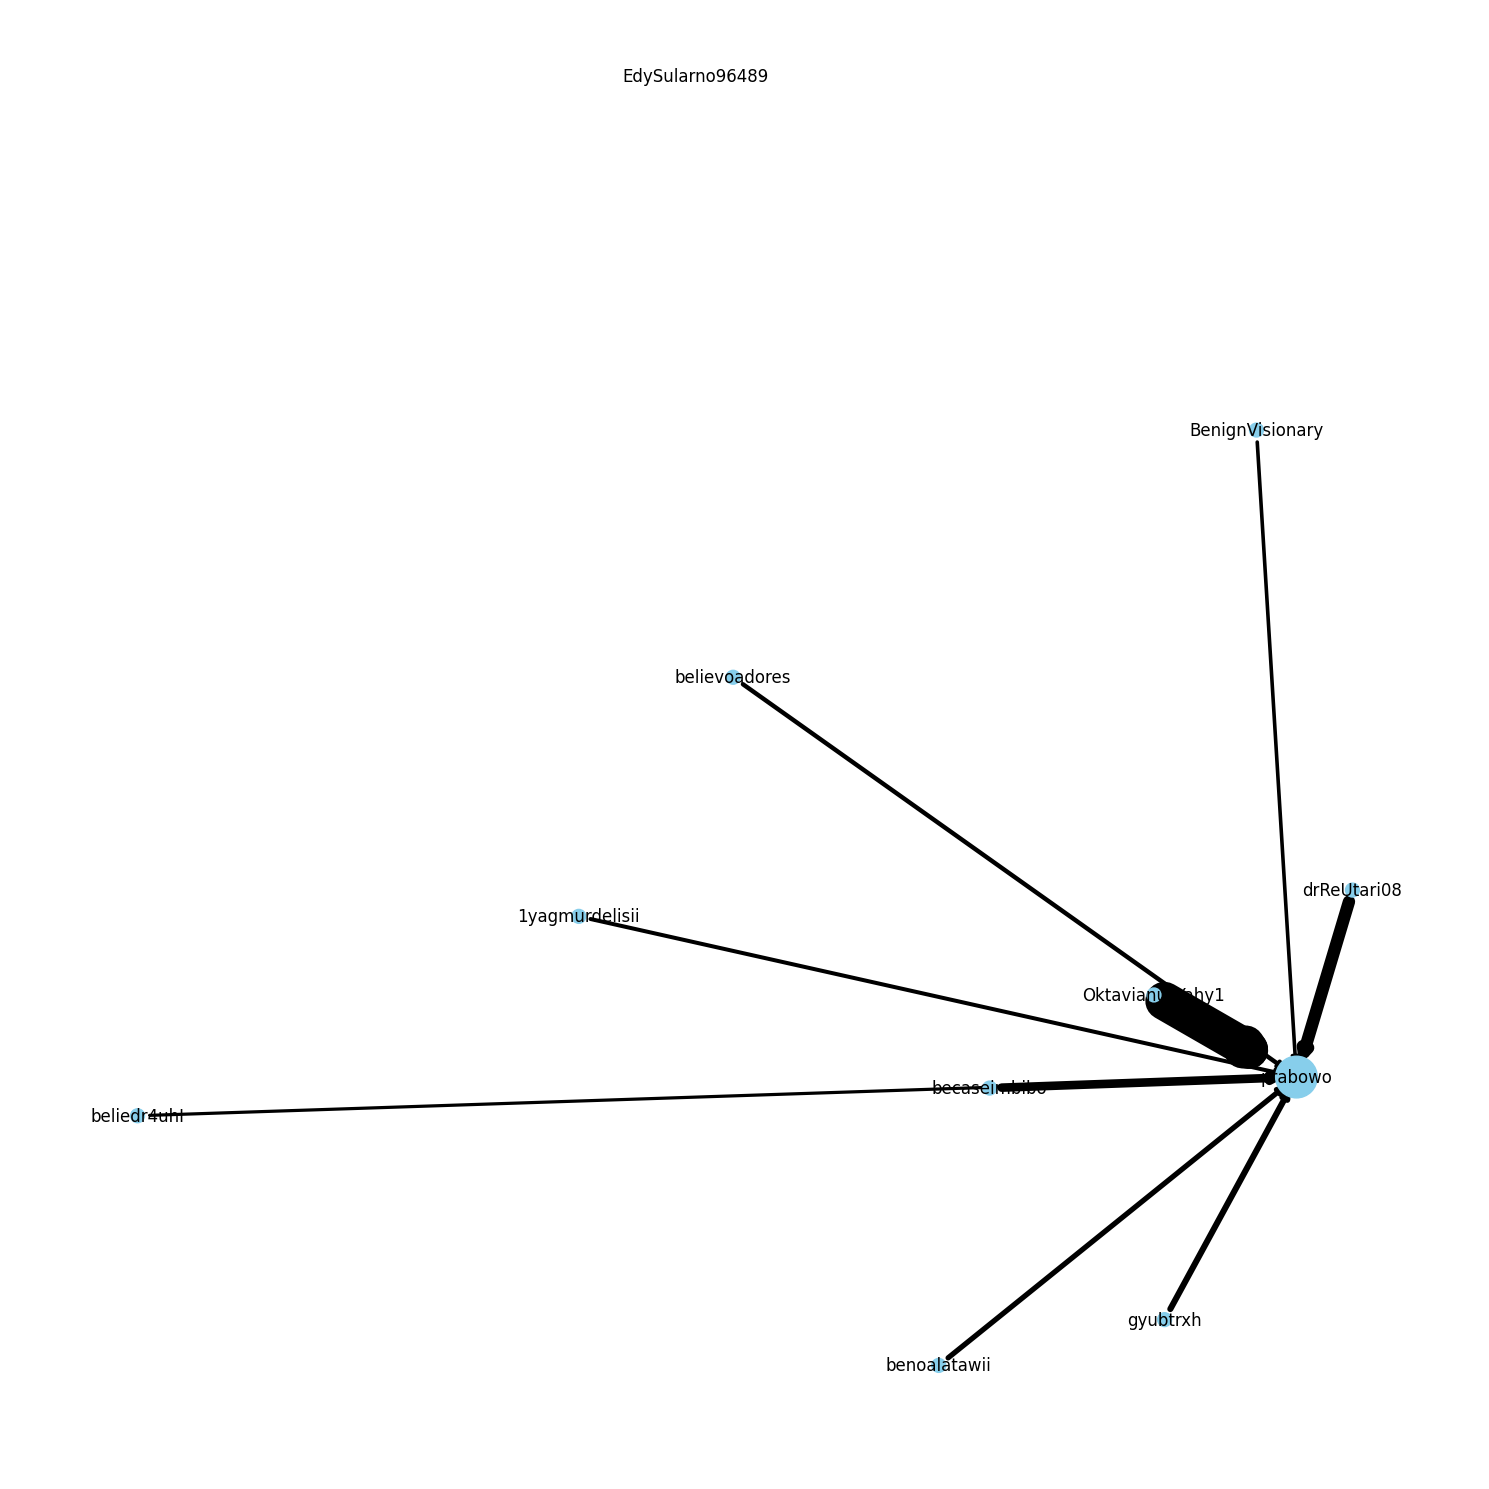

In [121]:
# Create a directed graph 
G = nx.DiGraph()

# Add nodes from the top 10 accounts that frequently mention Prabowo
for username in top_10_accounts:
    G.add_node(username)

# Add edges based on retweet and reply count
# Note: This is just an example and may need to be adjusted for your data structure
for index, row in top_interactors_with_top10.iterrows():
    if row['retweet_count'] > 0:
        G.add_edge(index, 'prabowo', weight=row['retweet_count'], interaction='retweet')
    if row['reply_count'] > 0:
        G.add_edge(index, 'prabowo', weight=row['reply_count'], interaction='reply')

# Determine the positions of nodes
pos = nx.spring_layout(G, k=1, iterations=50)  # Increased k for more spacing

plt.figure(figsize=(15, 15))  # Increase the figure size

# Draw nodes
node_sizes = [G.degree(n) * 100 for n in G.nodes()]  # Increase node size multiplier
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')

# Draw edges with weighting
edge_widths = [2 + G[u][v]['weight'] * 0.3 for u, v in G.edges()]  # Increase edge thickness
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color='black')

# Draw labels with adjusted font size
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=12, font_color='black')  # Increase font size

# Display visualization
plt.axis('off')
plt.tight_layout()
plt.show()


In [122]:
top_interactors_with_top10.to_excel('top_10_prabowo_mentioners.xlsx', index=False)

**4.7 Tableau Dashboard Data Preparations**

**4.7.1 Hashtags Analysis**

**Export the Preprocessed CSV**

In [ ]:
# Export dataset into csv
data.to_csv('twitter_sentiment_analysis.csv', index=False)

In [58]:
data = pd.read_csv('twitter_sentiment_analysis.csv',delimiter=',')
data

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,VerifiedStatus,FollowersCount,sentiment_label,sentiment_score,hashtag,text_processed,day_of_week,tweet_engagement
0,2023-11-15,1724940299250827575,@xquitavee @prabowo @gibran_tweet @psi_id @jok...,0,0,0,0,in,1420228891994517507,1724591423444713876,AmirMah36541437,https://twitter.com/AmirMah36541437/status/172...,Not Verified,NaN,netral,0,[],gua nomor salam perubahan,2,0.0
1,2023-11-15,1724940167767785893,@yehovarapha_ Boleh gak mutualan sama pendukun...,0,0,0,0,in,781527721,1724770699737444761,numadayana,https://twitter.com/numadayana/status/17249401...,Not Verified,10500.0,negatif,-1,[],gak mutualan pendukung prabowo gibran,2,0.0
2,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,golkarpedia,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,"['#airlanggahartarto', '#kuningkeren', '#Prabo...",nurul arifin apresiasi keputusan kpu penetapan...,2,54.5
3,2023-11-15,1724939961080991996,@uludagerdi @hariqosatria @prabowo @gibran_twe...,0,0,0,0,in,891872532,1723518365321568366,hagj12,https://twitter.com/hagj12/status/172493996108...,Not Verified,NaN,netral,0,[],no menang,2,0.0
4,2023-11-15,1724939341246697524,Saatnya Rakyat memilih untuk Indonesia....Prog...,0,2,9,22,in,1227499861580251136,1724939341246697524,Lembayung071,https://twitter.com/Lembayung071/status/172493...,Not Verified,12200.0,positif,1,['#PrabowoGibran2024'],rakyat memilih indonesia program prioritas pra...,2,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12887,2023-12-15,1735764587679715584,@psi_id 14 Februari 2024 Prabowo Gibran ✌️,0,0,0,0,in,945481436,1735673656259289587,axelbaronn,https://twitter.com/axelbaronn/status/17357645...,Not Verified,NaN,netral,0,[],februari prabowo gibran,4,0.0
12888,2023-12-15,1735764448273670198,"Inilah satu contoh NEGARA KEKUASAAN"" yg diseb...",0,0,0,0,in,1641722122874814464,1735764448273670198,Indra1444H,https://twitter.com/Indra1444H/status/17357644...,Not Verified,26.0,netral,0,[],contoh negara kekuasaan yg aturan hukum kendal...,4,0.0
12889,2023-12-15,1735764204051931312,@Beritasatu Prabowo Gibran pemimpin paling tep...,0,0,0,0,in,1598486990994874368,1735537443305402560,Rezaind8,https://twitter.com/Rezaind8/status/1735764204...,Not Verified,NaN,positif,1,[],prabowo gibran pemimpin kesejahteraan masyarakat,4,0.0
12890,2023-12-15,1735763927739572503,@Beritasatu Inilah Prabowo Gibran pemimpin ida...,0,0,0,0,in,1598502855467376642,1735537443305402560,AngestiNina,https://twitter.com/AngestiNina/status/1735763...,Not Verified,NaN,positif,1,[],prabowo gibran pemimpin idaman masyarakat indo...,4,0.0


**Exporting the Preprocessed Hashtags into CSV**

In [71]:
import ast # Import the ast package for applying the exploded hashtags into lists

In [62]:
# Loading the data
df = data.copy()

In [63]:
df # Print the data

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,VerifiedStatus,FollowersCount,sentiment_label,sentiment_score,hashtag,text_processed,day_of_week,tweet_engagement
0,2023-11-15,1724940299250827575,@xquitavee @prabowo @gibran_tweet @psi_id @jok...,0,0,0,0,in,1420228891994517507,1724591423444713876,AmirMah36541437,https://twitter.com/AmirMah36541437/status/172...,Not Verified,NaN,netral,0,[],gua nomor salam perubahan,2,0.0
1,2023-11-15,1724940167767785893,@yehovarapha_ Boleh gak mutualan sama pendukun...,0,0,0,0,in,781527721,1724770699737444761,numadayana,https://twitter.com/numadayana/status/17249401...,Not Verified,10500.0,negatif,-1,[],gak mutualan pendukung prabowo gibran,2,0.0
2,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,golkarpedia,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,"['#airlanggahartarto', '#kuningkeren', '#Prabo...",nurul arifin apresiasi keputusan kpu penetapan...,2,54.5
3,2023-11-15,1724939961080991996,@uludagerdi @hariqosatria @prabowo @gibran_twe...,0,0,0,0,in,891872532,1723518365321568366,hagj12,https://twitter.com/hagj12/status/172493996108...,Not Verified,NaN,netral,0,[],no menang,2,0.0
4,2023-11-15,1724939341246697524,Saatnya Rakyat memilih untuk Indonesia....Prog...,0,2,9,22,in,1227499861580251136,1724939341246697524,Lembayung071,https://twitter.com/Lembayung071/status/172493...,Not Verified,12200.0,positif,1,['#PrabowoGibran2024'],rakyat memilih indonesia program prioritas pra...,2,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12887,2023-12-15,1735764587679715584,@psi_id 14 Februari 2024 Prabowo Gibran ✌️,0,0,0,0,in,945481436,1735673656259289587,axelbaronn,https://twitter.com/axelbaronn/status/17357645...,Not Verified,NaN,netral,0,[],februari prabowo gibran,4,0.0
12888,2023-12-15,1735764448273670198,"Inilah satu contoh NEGARA KEKUASAAN"" yg diseb...",0,0,0,0,in,1641722122874814464,1735764448273670198,Indra1444H,https://twitter.com/Indra1444H/status/17357644...,Not Verified,26.0,netral,0,[],contoh negara kekuasaan yg aturan hukum kendal...,4,0.0
12889,2023-12-15,1735764204051931312,@Beritasatu Prabowo Gibran pemimpin paling tep...,0,0,0,0,in,1598486990994874368,1735537443305402560,Rezaind8,https://twitter.com/Rezaind8/status/1735764204...,Not Verified,NaN,positif,1,[],prabowo gibran pemimpin kesejahteraan masyarakat,4,0.0
12890,2023-12-15,1735763927739572503,@Beritasatu Inilah Prabowo Gibran pemimpin ida...,0,0,0,0,in,1598502855467376642,1735537443305402560,AngestiNina,https://twitter.com/AngestiNina/status/1735763...,Not Verified,NaN,positif,1,[],prabowo gibran pemimpin idaman masyarakat indo...,4,0.0


In [64]:
# Generating the hashtags separation into lists
df['hashtag'] = df['hashtag'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,VerifiedStatus,FollowersCount,sentiment_label,sentiment_score,hashtag,text_processed,day_of_week,tweet_engagement
0,2023-11-15,1724940299250827575,@xquitavee @prabowo @gibran_tweet @psi_id @jok...,0,0,0,0,in,1420228891994517507,1724591423444713876,AmirMah36541437,https://twitter.com/AmirMah36541437/status/172...,Not Verified,NaN,netral,0,[],gua nomor salam perubahan,2,0.0
1,2023-11-15,1724940167767785893,@yehovarapha_ Boleh gak mutualan sama pendukun...,0,0,0,0,in,781527721,1724770699737444761,numadayana,https://twitter.com/numadayana/status/17249401...,Not Verified,10500.0,negatif,-1,[],gak mutualan pendukung prabowo gibran,2,0.0
2,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,golkarpedia,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,"[#airlanggahartarto, #kuningkeren, #PrabowoGib...",nurul arifin apresiasi keputusan kpu penetapan...,2,54.5
3,2023-11-15,1724939961080991996,@uludagerdi @hariqosatria @prabowo @gibran_twe...,0,0,0,0,in,891872532,1723518365321568366,hagj12,https://twitter.com/hagj12/status/172493996108...,Not Verified,NaN,netral,0,[],no menang,2,0.0
4,2023-11-15,1724939341246697524,Saatnya Rakyat memilih untuk Indonesia....Prog...,0,2,9,22,in,1227499861580251136,1724939341246697524,Lembayung071,https://twitter.com/Lembayung071/status/172493...,Not Verified,12200.0,positif,1,[#PrabowoGibran2024],rakyat memilih indonesia program prioritas pra...,2,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12887,2023-12-15,1735764587679715584,@psi_id 14 Februari 2024 Prabowo Gibran ✌️,0,0,0,0,in,945481436,1735673656259289587,axelbaronn,https://twitter.com/axelbaronn/status/17357645...,Not Verified,NaN,netral,0,[],februari prabowo gibran,4,0.0
12888,2023-12-15,1735764448273670198,"Inilah satu contoh NEGARA KEKUASAAN"" yg diseb...",0,0,0,0,in,1641722122874814464,1735764448273670198,Indra1444H,https://twitter.com/Indra1444H/status/17357644...,Not Verified,26.0,netral,0,[],contoh negara kekuasaan yg aturan hukum kendal...,4,0.0
12889,2023-12-15,1735764204051931312,@Beritasatu Prabowo Gibran pemimpin paling tep...,0,0,0,0,in,1598486990994874368,1735537443305402560,Rezaind8,https://twitter.com/Rezaind8/status/1735764204...,Not Verified,NaN,positif,1,[],prabowo gibran pemimpin kesejahteraan masyarakat,4,0.0
12890,2023-12-15,1735763927739572503,@Beritasatu Inilah Prabowo Gibran pemimpin ida...,0,0,0,0,in,1598502855467376642,1735537443305402560,AngestiNina,https://twitter.com/AngestiNina/status/1735763...,Not Verified,NaN,positif,1,[],prabowo gibran pemimpin idaman masyarakat indo...,4,0.0


In [65]:
# Seperating the hashtags into lists
df_exploded = df.explode('hashtag')
df_exploded

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,VerifiedStatus,FollowersCount,sentiment_label,sentiment_score,hashtag,text_processed,day_of_week,tweet_engagement
0,2023-11-15,1724940299250827575,@xquitavee @prabowo @gibran_tweet @psi_id @jok...,0,0,0,0,in,1420228891994517507,1724591423444713876,AmirMah36541437,https://twitter.com/AmirMah36541437/status/172...,Not Verified,NaN,netral,0,NaN,gua nomor salam perubahan,2,0.0
1,2023-11-15,1724940167767785893,@yehovarapha_ Boleh gak mutualan sama pendukun...,0,0,0,0,in,781527721,1724770699737444761,numadayana,https://twitter.com/numadayana/status/17249401...,Not Verified,10500.0,negatif,-1,NaN,gak mutualan pendukung prabowo gibran,2,0.0
2,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,golkarpedia,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,#airlanggahartarto,nurul arifin apresiasi keputusan kpu penetapan...,2,54.5
2,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,golkarpedia,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,#kuningkeren,nurul arifin apresiasi keputusan kpu penetapan...,2,54.5
2,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,golkarpedia,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,#PrabowoGibran,nurul arifin apresiasi keputusan kpu penetapan...,2,54.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12887,2023-12-15,1735764587679715584,@psi_id 14 Februari 2024 Prabowo Gibran ✌️,0,0,0,0,in,945481436,1735673656259289587,axelbaronn,https://twitter.com/axelbaronn/status/17357645...,Not Verified,NaN,netral,0,NaN,februari prabowo gibran,4,0.0
12888,2023-12-15,1735764448273670198,"Inilah satu contoh NEGARA KEKUASAAN"" yg diseb...",0,0,0,0,in,1641722122874814464,1735764448273670198,Indra1444H,https://twitter.com/Indra1444H/status/17357644...,Not Verified,26.0,netral,0,NaN,contoh negara kekuasaan yg aturan hukum kendal...,4,0.0
12889,2023-12-15,1735764204051931312,@Beritasatu Prabowo Gibran pemimpin paling tep...,0,0,0,0,in,1598486990994874368,1735537443305402560,Rezaind8,https://twitter.com/Rezaind8/status/1735764204...,Not Verified,NaN,positif,1,NaN,prabowo gibran pemimpin kesejahteraan masyarakat,4,0.0
12890,2023-12-15,1735763927739572503,@Beritasatu Inilah Prabowo Gibran pemimpin ida...,0,0,0,0,in,1598502855467376642,1735537443305402560,AngestiNina,https://twitter.com/AngestiNina/status/1735763...,Not Verified,NaN,positif,1,NaN,prabowo gibran pemimpin idaman masyarakat indo...,4,0.0


In [66]:
# Counting the cumulative amounts of the hashtags per day
df_exploded['cumulative_count'] = df_exploded.groupby('hashtag').cumcount() + 1

In [67]:
df_exploded

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,...,tweet_url,VerifiedStatus,FollowersCount,sentiment_label,sentiment_score,hashtag,text_processed,day_of_week,tweet_engagement,cumulative_count
0,2023-11-15,1724940299250827575,@xquitavee @prabowo @gibran_tweet @psi_id @jok...,0,0,0,0,in,1420228891994517507,1724591423444713876,...,https://twitter.com/AmirMah36541437/status/172...,Not Verified,NaN,netral,0,NaN,gua nomor salam perubahan,2,0.0,NaN
1,2023-11-15,1724940167767785893,@yehovarapha_ Boleh gak mutualan sama pendukun...,0,0,0,0,in,781527721,1724770699737444761,...,https://twitter.com/numadayana/status/17249401...,Not Verified,10500.0,negatif,-1,NaN,gak mutualan pendukung prabowo gibran,2,0.0,NaN
2,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,...,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,#airlanggahartarto,nurul arifin apresiasi keputusan kpu penetapan...,2,54.5,1.0
2,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,...,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,#kuningkeren,nurul arifin apresiasi keputusan kpu penetapan...,2,54.5,1.0
2,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,...,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,#PrabowoGibran,nurul arifin apresiasi keputusan kpu penetapan...,2,54.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12887,2023-12-15,1735764587679715584,@psi_id 14 Februari 2024 Prabowo Gibran ✌️,0,0,0,0,in,945481436,1735673656259289587,...,https://twitter.com/axelbaronn/status/17357645...,Not Verified,NaN,netral,0,NaN,februari prabowo gibran,4,0.0,NaN
12888,2023-12-15,1735764448273670198,"Inilah satu contoh NEGARA KEKUASAAN"" yg diseb...",0,0,0,0,in,1641722122874814464,1735764448273670198,...,https://twitter.com/Indra1444H/status/17357644...,Not Verified,26.0,netral,0,NaN,contoh negara kekuasaan yg aturan hukum kendal...,4,0.0,NaN
12889,2023-12-15,1735764204051931312,@Beritasatu Prabowo Gibran pemimpin paling tep...,0,0,0,0,in,1598486990994874368,1735537443305402560,...,https://twitter.com/Rezaind8/status/1735764204...,Not Verified,NaN,positif,1,NaN,prabowo gibran pemimpin kesejahteraan masyarakat,4,0.0,NaN
12890,2023-12-15,1735763927739572503,@Beritasatu Inilah Prabowo Gibran pemimpin ida...,0,0,0,0,in,1598502855467376642,1735537443305402560,...,https://twitter.com/AngestiNina/status/1735763...,Not Verified,NaN,positif,1,NaN,prabowo gibran pemimpin idaman masyarakat indo...,4,0.0,NaN


In [68]:
# Removing rows with no hashtags
df_exploded = df_exploded[df_exploded['hashtag'].notna()]

# Generating the hashtags cumulative counts
df_exploded['cumulative_count'] = df_exploded.groupby('hashtag').cumcount() + 1

# Reset the Index
df_exploded.reset_index(drop=True, inplace=True)

In [69]:
df_exploded

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,...,tweet_url,VerifiedStatus,FollowersCount,sentiment_label,sentiment_score,hashtag,text_processed,day_of_week,tweet_engagement,cumulative_count
0,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,...,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,#airlanggahartarto,nurul arifin apresiasi keputusan kpu penetapan...,2,54.5,1
1,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,...,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,#kuningkeren,nurul arifin apresiasi keputusan kpu penetapan...,2,54.5,1
2,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,...,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,#PrabowoGibran,nurul arifin apresiasi keputusan kpu penetapan...,2,54.5,1
3,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,...,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,#partaigolkar,nurul arifin apresiasi keputusan kpu penetapan...,2,54.5,1
4,2023-11-15,1724940091058163837,Nurul Arifin Apresiasi Keputusan KPU Atas Pene...,0,0,49,11,in,721898354502930433,1724940091058163837,...,https://twitter.com/golkarpedia/status/1724940...,Not Verified,2306.0,netral,0,#golkarpedia,nurul arifin apresiasi keputusan kpu penetapan...,2,54.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9057,2023-12-15,1735778054947876922,@Perju4ng4n @prabowo @gibran_tweet @ruhutsitom...,0,0,0,0,in,1636878002352185344,1735579949132906867,...,https://twitter.com/sapiensarbanga/status/1735...,Not Verified,NaN,positif,1,#DukungPrabowo,sosok pemimpin beliau lho debat kemarin,4,0.0,2
9058,2023-12-15,1735773076804247813,17 Program Prioritas Prabowo Gibran: Menciptak...,0,0,0,0,in,1698558946695622656,1735773076804247813,...,https://twitter.com/rania_melida/status/173577...,Not Verified,13.0,netral,0,#02UntukIndonesiaMaju,program prioritas prabowo gibran menciptakan l...,4,0.0,4
9059,2023-12-15,1735773071238369588,17 Program Prioritas Prabowo Gibran: Menggali ...,0,0,0,0,in,1670681826116116480,1735773071238369588,...,https://twitter.com/agussalman31/status/173577...,Not Verified,5.0,netral,0,#02UntukIndonesiaMaju,program prioritas prabowo gibran menggali pote...,4,0.0,5
9060,2023-12-15,1735773068579217640,17 Program Prioritas Prabowo Gibran: Menyelara...,0,0,0,0,in,1719277298074165248,1735773068579217640,...,https://twitter.com/BrendaGita31575/status/173...,Not Verified,42.0,netral,0,#02UntukIndonesiaMaju,program prioritas prabowo gibran menyelaraskan...,4,0.0,6


In [72]:
# Export the exploded hashtags to CSV for dashboard preparations
df_exploded.to_csv('exploded_hashtags.csv', index=False)

**4.7.2 Tweets Analysis**

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
# Loading the dataset
df = pd.read_csv("twitter_sentiment_analysis.csv",delimiter=',')

In [75]:
# Replacing NaN with empty strings
df['text_processed'] = df['text_processed'].fillna('')

In [76]:
# Function to generate n-grams with 'created_at' date
def generate_ngrams_with_date(row, n=2):
    text = row['text_processed']
    date = row['created_at']
    vectorizer = CountVectorizer(ngram_range=(n, n))
    try:
        X = vectorizer.fit_transform([text])
        grams = vectorizer.get_feature_names_out()
        counts = X.toarray().sum(axis=0)
        return pd.DataFrame({'created_at': date, 'phrase': grams, 'count': counts})
    except ValueError:
        # Return empty DataFrame for rows where vectorizer returns an error
        return pd.DataFrame({'created_at': [date], 'phrase': [''], 'count': [0]})

In [77]:
# Applying the function to each row and concatenating the results
ngrams_list = [generate_ngrams_with_date(row, n=2) for index, row in df.iterrows()]
ngrams_df = pd.concat(ngrams_list, ignore_index=True)

In [78]:
# Filtering out rows with empty phrases
ngrams_df = ngrams_df[ngrams_df['phrase'] != '']

In [79]:
# Grouping the data
ngrams_df_grouped = ngrams_df.groupby(['created_at', 'phrase'], as_index=False).sum()

# Sorting the grouped data
ngrams_df_sorted = ngrams_df_grouped.sort_values(by='count', ascending=False)


In [80]:
# Saving the processed data
ngrams_df_sorted.to_csv('twitter_bigrams_for_tableau.csv', index=False)

In [81]:
df = pd.read_csv("twitter_bigrams_for_tableau.csv",delimiter=',')
df

,created_at,phrase,count
0,2023-11-28,prabowo gibran,591
1,2023-12-11,prabowo gibran,515
2,2023-12-10,prabowo gibran,509
3,2023-12-09,prabowo gibran,488
4,2023-12-14,prabowo gibran,468
...,...,...,...
87559,2023-11-30,kuyakin kiamatpun,1
87560,2023-11-30,kunjung kampanye,1
87561,2023-11-30,kumpulkan tkd,1
87562,2023-11-30,kumpulkan dewan,1


**4.7.3 Analysis of Unique Usernames per Date**

In [82]:
# Ensure 'created_at' is datetime
data['created_at'] = pd.to_datetime(data['created_at'])

# Group by 'created_at' (date part) and count unique usernames
accounts_per_date = data.groupby(data['created_at'].dt.date)['username'].nunique().reset_index()

# Rename columns for clarity
accounts_per_date.columns = ['Date', 'UniqueUsernames']

# Optionally, save this to a new CSV file
accounts_per_date.to_csv('accounts_per_date.csv', index=False)


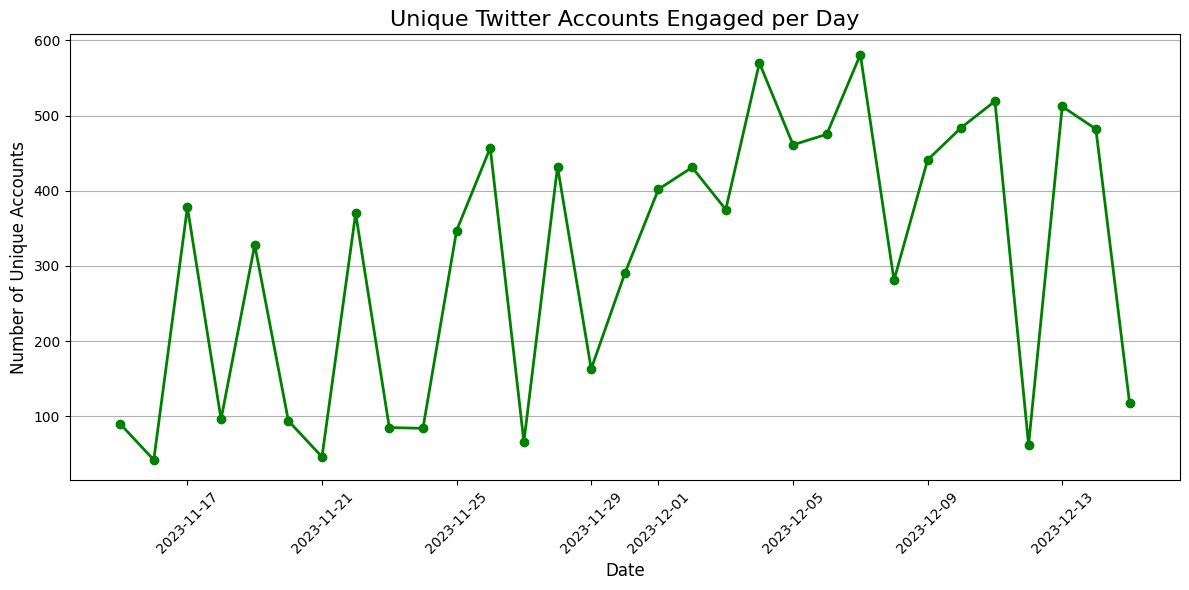

In [83]:
# Re-ensuring the 'created_at' feature is in the format of datetime data type
data['created_at'] = pd.to_datetime(data['created_at'])

# Grouping by 'created_at' and counting unique usernames to get the total accounts engaged each day
accounts_per_date = data.groupby(data['created_at'].dt.date)['username'].nunique()

plt.figure(figsize=(12, 6))

# Plotting the total accounts engaged per day
accounts_per_date.plot(kind='line', marker='o', linestyle='-', color='green', linewidth=2, markersize=6)

plt.title('Unique Twitter Accounts Engaged per Day', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Unique Accounts', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# V. Challenges and Limitations of The Project

Some challenges and limitations faced in this project include:

1. The substantial number of tweets required a time-consuming data retrieval process and necessitated more complex data processing.
2. Limitations on the Twitter API meant search results could not be displayed over specific time ranges, requiring the data retrieval process to be divided into several stages.
3. Changes to usernames for some Twitter accounts complicated the process of extracting followers, which were ultimately considered as missing values.

# VI. Conclusions

1. **Main Themes and Focus of Discussion:** The most frequently used hashtags and phrases that commonly appear in tweets indicate that the most recurrent topics of discussion related to Prabowo-Gibran as candidates for President and Vice President of the Republic of Indonesia involve conversations about support for victory or development, religious or spiritual affiliations, and discussions related to specific political parties.
2. **Variations in Sentiment Levels:** The data also shows a variation in sentiments within the discussions. There are tweets that contain positive, neutral, and negative sentiments. Some accounts make significant contributions in each sentiment category.
3. **Variation in Tweeting Activity:** The pattern of tweet activity shows significant fluctuations from day to day. There are sharp increases and decreases in the number of tweets on various days, indicating that there are specific events or topics that capture Twitter users' attention during the observed time frame.
4. **Daily and Weekly Activity Patterns:** Daily and weekly activity patterns show that tweeting activity tends to be higher mid-week and on weekends. Conversely, lower activity is observed at the beginning of the workweek.
5. **Variation in Account Participation:** The number of accounts involved in the topic also shows significant daily fluctuations. There are periods with high and low participation from the number of accounts involved in the discussions.
6. **Significant Impact of High-Follower Accounts:** Twitter accounts with a high number of followers (Verified Accounts) tend to garner higher engagement compared to Twitter accounts with the most tweets.
7. **The Importance of Engaging Content to Increase Engagement:** This data affirms the importance of interesting and relevant content for followers in boosting engagement levels, regardless of how often an account tweets or the number of followers it has.